In [1]:
library(maps)
library(dplyr)
library(mice)
library(VIM)
library(pander)
library(lattice)
library(mltools)
library(car)
library(plyr)
library(ggthemes)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)
library(GGally)
library(corrplot)
library(Hmisc)
library(openintro)
knitr::opts_chunk$set(fig.width=12, fig.height=8) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

  

In [ ]:
census2 = read.csv('acs2015_census_tract_data.csv', header = TRUE)

In [2]:
names(census2)

ERROR: Error in eval(expr, envir, enclos): object 'census2' not found


In [3]:
census = read.csv('acs2015_census_tract_data.csv', header = TRUE)
head(census)
summary(census)

CensusTract State   County  TotalPop Men  Women Hispanic White Black Native ⋯
1 1001020100  Alabama Autauga  1948     940 1008   0.9     87.4   7.7  0.3    ⋯
2 1001020200  Alabama Autauga  2156    1059 1097   0.8     40.4  53.3  0.0    ⋯
3 1001020300  Alabama Autauga  2968    1364 1604   0.0     74.5  18.6  0.5    ⋯
4 1001020400  Alabama Autauga  4423    2172 2251  10.5     82.8   3.7  1.6    ⋯
5 1001020500  Alabama Autauga 10763    4922 5841   0.7     68.5  24.8  0.0    ⋯
6 1001020600  Alabama Autauga  3851    1787 2064  13.1     72.9  11.9  0.0    ⋯
  Walk OtherTransp WorkAtHome MeanCommute Employed PrivateWork PublicWork
1 0.5  2.3         2.1        25.0         943     77.1        18.3      
2 0.0  0.7         0.0        23.4         753     77.0        16.9      
3 0.0  0.0         2.5        19.6        1373     64.1        23.6      
4 0.0  2.6         1.6        25.3        1782     75.7        21.2      
5 0.0  0.6         0.9        24.8        5037     67.1        27.6      
6 0.0  6.0         4.5        19.8        1560     79.4        14.7      
  SelfEmployed FamilyWork Unemployment
1  4.6         0           5.4        
2  6.1         0          13.3        
3 12.3         0           6.2        
4  3.1         0          10.8        
5  5.3         0           4.2        
6  5.8         0          10.9

  CensusTract                 State               County         TotalPop    
 Min.   :1.001e+09   California  : 8057   Los Angeles: 2346   Min.   :    0  
 1st Qu.:1.304e+10   Texas       : 5265   Cook       : 1326   1st Qu.: 2891  
 Median :2.805e+10   New York    : 4918   Orange     :  939   Median : 4063  
 Mean   :2.839e+10   Florida     : 4245   Jefferson  :  927   Mean   : 4326  
 3rd Qu.:4.200e+10   Pennsylvania: 3218   Maricopa   :  916   3rd Qu.: 5442  
 Max.   :7.215e+10   Illinois    : 3123   Montgomery :  833   Max.   :53812  
                     (Other)     :45175   (Other)    :66714                  
      Men            Women          Hispanic          White       
 Min.   :    0   Min.   :    0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 1409   1st Qu.: 1461   1st Qu.:  2.40   1st Qu.: 39.40  
 Median : 1986   Median : 2066   Median :  7.00   Median : 71.40  
 Mean   : 2128   Mean   : 2198   Mean   : 16.86   Mean   : 62.03  
 3rd Qu.: 2674   3rd Qu.: 2774   3rd Qu.:

In [4]:
census$State = factor(census$State)
census$County = factor(census$County)
missingdata= census[!complete.cases(census),]

In [5]:
census$Complete = complete.cases(census)
missing_percent = census %>% 
        dplyr::group_by(State) %>% 
        dplyr::summarise(total_count = n(), na_count = sum(!Complete), percent = sum(!Complete)/n())


In [6]:
tolower(missing_percent$State)

[1] "alabama"              "alaska"               "arizona"             
 [4] "arkansas"             "california"           "colorado"            
 [7] "connecticut"          "delaware"             "district of columbia"
[10] "florida"              "georgia"              "hawaii"              
[13] "idaho"                "illinois"             "indiana"             
[16] "iowa"                 "kansas"               "kentucky"            
[19] "louisiana"            "maine"                "maryland"            
[22] "massachusetts"        "michigan"             "minnesota"           
[25] "mississippi"          "missouri"             "montana"             
[28] "nebraska"             "nevada"               "new hampshire"       
[31] "new jersey"           "new mexico"           "new york"            
[34] "north carolina"       "north dakota"         "ohio"                
[37] "oklahoma"             "oregon"               "pennsylvania"        
[40] "puerto rico"          "rhode island"         "south carolina"      
[43] "south dakota"         "tennessee"            "texas"               
[46] "utah"                 "vermont"              "virginia"            
[49] "washington"           "west virginia"        "wisconsin"           
[52] "wyoming"

In [7]:
library('mapproj')

In [8]:
us_states <- map_data("state")
missing_percent$State = tolower(missing_percent$State)

temp = names(us_states)
temp[5] = "State"
names(us_states) = temp

us_states_missing <- left_join(us_states, missing_percent, by = "State")

In [9]:
missing_percent

State                total_count na_count percent    
1  alabama              1181          9      0.007620660
2  alaska                167          3      0.017964072
3  arizona              1526         46      0.030144168
4  arkansas              686          3      0.004373178
5  california           8057        124      0.015390344
6  colorado             1249         21      0.016813451
7  connecticut           833         16      0.019207683
8  delaware              218          5      0.022935780
9  district of columbia  179          4      0.022346369
10 florida              4245        136      0.032037691
11 georgia              1969         20      0.010157440
12 hawaii                351         42      0.119658120
13 idaho                 298          1      0.003355705
14 illinois             3123         17      0.005443484
15 indiana              1511         12      0.007941760
16 iowa                  825          4      0.004848485
17 kansas                770         11      0.014285714
18 kentucky             1115         12      0.010762332
19 louisiana            1148         26      0.022648084
20 maine                 358          7      0.019553073
21 maryland             1406         29      0.020625889
22 massachusetts        1478         25      0.016914750
23 michigan             2813         86      0.030572343
24 minnesota            1338          7      0.005231689
25 mississippi           664         10      0.015060241
26 missouri             1393          9      0.006460876
27 montana               271          3      0.011070111
28 nebraska              532          4      0.007518797
29 nevada                687         16      0.023289665
30 new hampshire         295          3      0.010169492
31 new jersey           2010         27      0.013432836
32 new mexico            499          1      0.002004008
33 new york             4918        135      0.027450183
34 north carolina       2195         35      0.015945330
35 north dakota          205          0      0.000000000
36 ohio                 2952         22      0.007452575
37 oklahoma             1046          9      0.008604207
38 oregon                834          9      0.010791367
39 pennsylvania         3218         40      0.012430081
40 puerto rico           945         71      0.075132275
41 rhode island          244          4      0.016393443
42 south carolina       1103         23      0.020852221
43 south dakota          222          0      0.000000000
44 tennessee            1497         26      0.017368069
45 texas                5265         68      0.012915480
46 utah                  588          6      0.010204082
47 vermont               184          1      0.005434783
48 virginia             1907         46      0.024121657
49 washington           1458         16      0.010973937
50 west virginia         484          0      0.000000000
51 wisconsin            1409         23      0.016323634
52 wyoming               132          1      0.007575758

### Fig1 - State Missing 

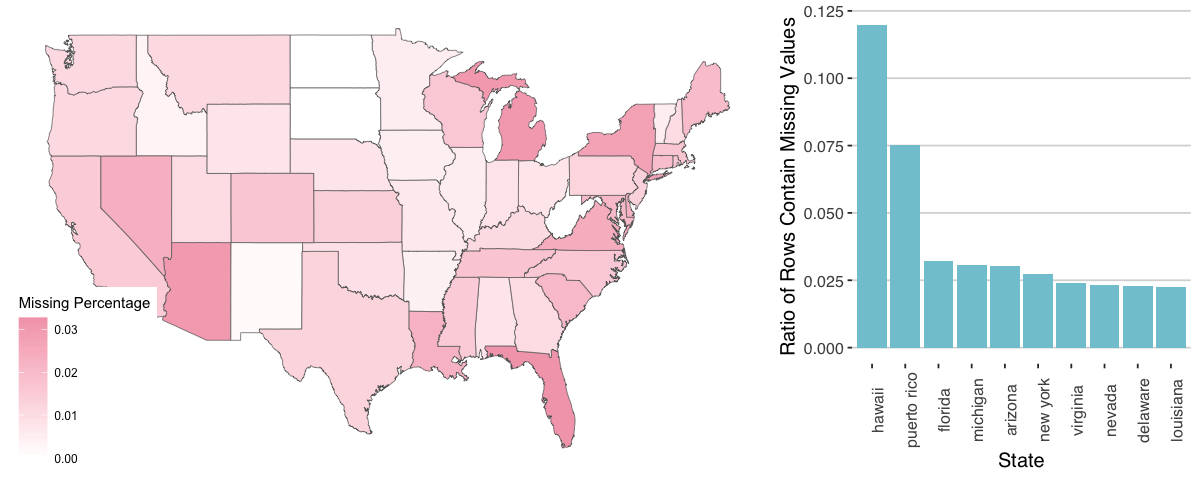

In [28]:
options(repr.plot.width=10, repr.plot.height=4)
p1 <- ggplot(data = us_states_missing,
             mapping = aes(x = long, y = lat, group = group, fill = percent)) + 
      geom_polygon(color = "gray40", size = 0.2) +
      # coord_map(projection = "albers", lat0 = 39, lat1 = 45) + 
      scale_fill_gradient2(low = "#81C7D4",  high = "#F4A7B9", midpoint=0) + 
      # scale_fill_gradient(low = "white", high = "#FF0000") +
      #ggtitle("Fig1: Data Missing Ratio for each state") + 
      labs(fill = "Missing Percentage") + 
      theme_map() 

missing_percent_sorted = missing_percent[with(missing_percent, order(percent,decreasing = TRUE)),]
missing_percent_sorted$State = factor(missing_percent_sorted$State, levels = missing_percent_sorted$State )
p2 <- ggplot(data = missing_percent_sorted[1:10,], mapping = aes(x=State)) + 
    geom_bar(aes(weight = percent), fill="#81C7D4") + 
    #ggtitle("Fig1: Top 10 Missing States") + 
    ylab("Ratio of Rows Contain Missing Values")  + 
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90))

grid.arrange(p1, p2, widths=c(1.8,1))

### Fig1 - State Missing 

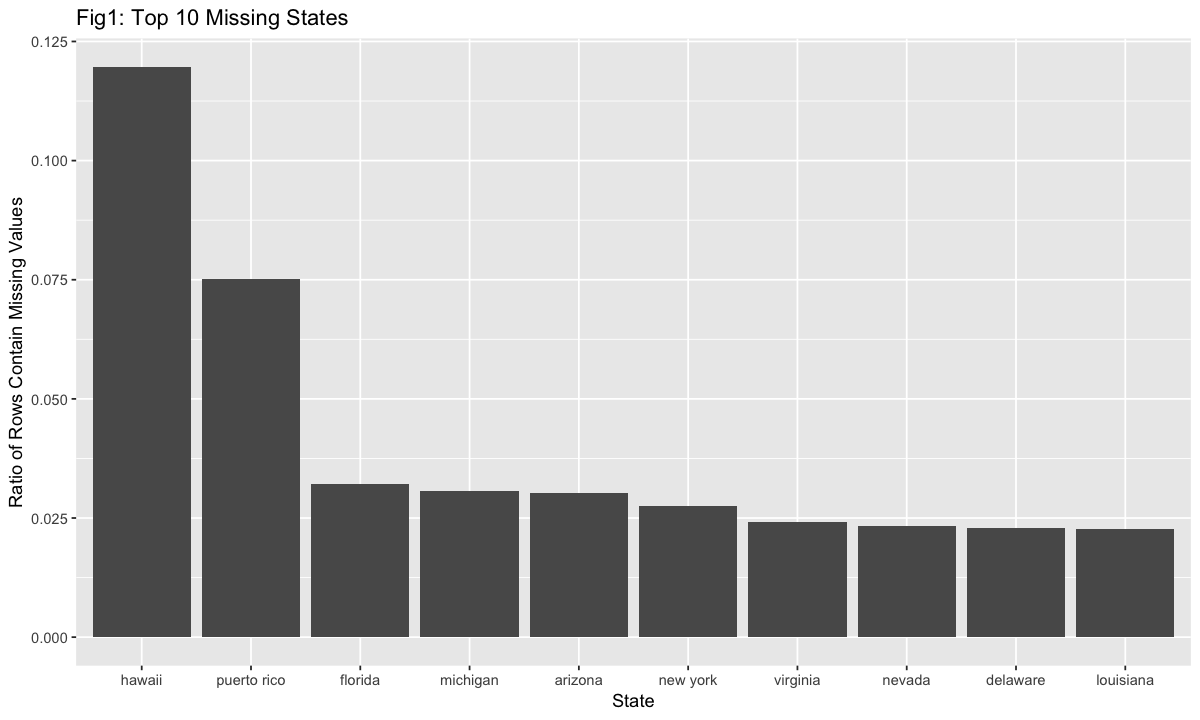

In [12]:
missing_percent_sorted = missing_percent[with(missing_percent, order(percent,decreasing = TRUE)),]
missing_percent_sorted$State = factor(missing_percent_sorted$State, levels = missing_percent_sorted$State )
ggplot(data = missing_percent_sorted[1:10,], mapping = aes(x=State)) + 
    geom_bar(aes(weight = percent)) + 
    ggtitle("Fig1: Top 10 Missing States") + 
    ylab("Ratio of Rows Contain Missing Values")

Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”


 Variables sorted by number of missings: 
        Variable       Count
    ChildPoverty 0.015107904
          Income 0.014864664
       IncomeErr 0.014864664
     MeanCommute 0.012824151
         Poverty 0.011283631
    Professional 0.010905258
         Service 0.010905258
          Office 0.010905258
    Construction 0.010905258
      Production 0.010905258
     PrivateWork 0.010905258
      PublicWork 0.010905258
    SelfEmployed 0.010905258
      FamilyWork 0.010905258
    Unemployment 0.010837691
           Drive 0.010770125
         Carpool 0.010770125
         Transit 0.010770125
            Walk 0.010770125
     OtherTransp 0.010770125
      WorkAtHome 0.010770125
    IncomePerCap 0.009999865
 IncomePerCapErr 0.009999865
        Hispanic 0.009324198
           White 0.009324198
           Black 0.009324198
          Native 0.009324198
           Asian 0.009324198
         Pacific 0.009324198
     CensusTract 0.000000000
           State 0.000000000
          County 0.000000000


Warning message in mean.default(census[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”Warning message in mean.default(census[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”

[1] 0

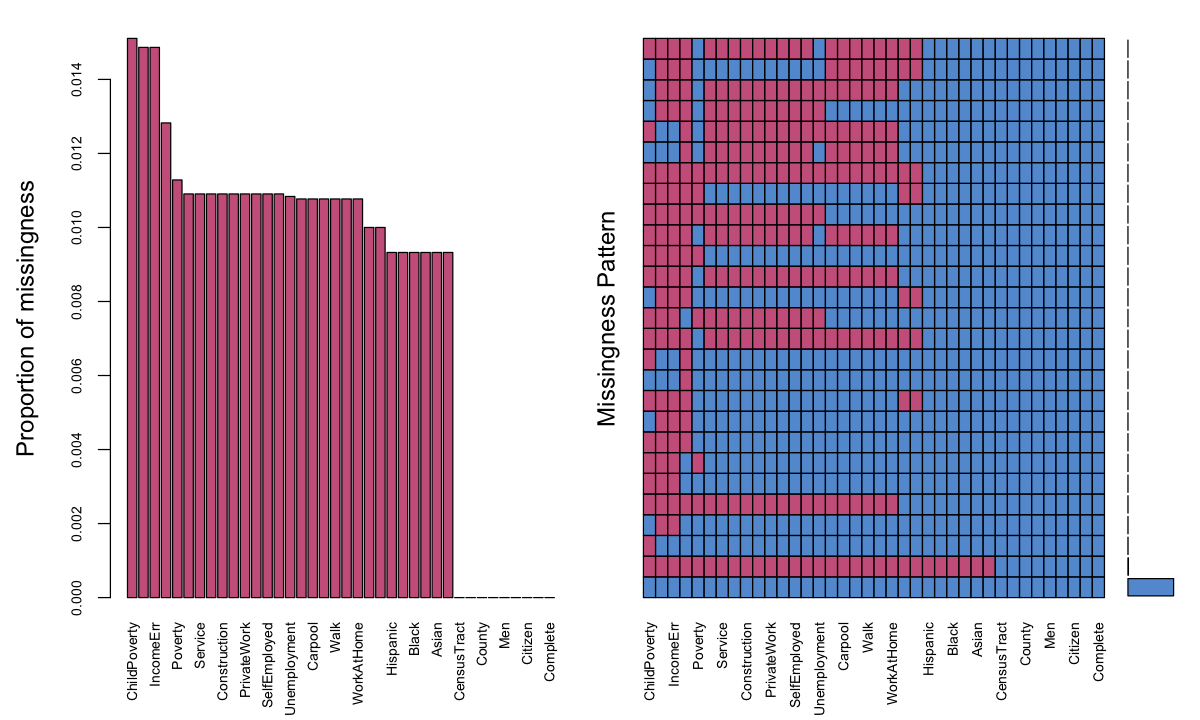

In [13]:
census_aggr = aggr(census,col=mdc(1:2), numbers=TRUE, sortVars=TRUE, 
                   cex.axis=.7, gap=3, ylab=c("Proportion of missingness","Missingness Pattern"))

for(i in 1:ncol(census)){
  census[is.na(census[,i]), i] <- mean(census[,i], na.rm = TRUE)
}
sum(!complete.cases(census))

In [14]:
attach(census)
census$Hispanic_pop = TotalPop*Hispanic/100
census$White_pop = TotalPop*White/100
census$Black_pop = TotalPop*Black/100
census$Native_pop = TotalPop*Native/100
census$Asian_pop = TotalPop*Asian/100
census$Pacific_pop = TotalPop*Pacific/100
census$Tot_Income = TotalPop*IncomePerCap
census$Poverty_pop = TotalPop*Poverty/100
census$ChildPoverty_pop = TotalPop*ChildPoverty/100
census$Professional_pop = TotalPop*Professional/100
census$Service_pop = TotalPop*Service/100
census$Office_pop = TotalPop*Office/100
census$Construction_pop = TotalPop*Construction/100
census$Production_pop = TotalPop*Production/100
census$Drive_pop = TotalPop*Drive/100
census$Carpool_pop = TotalPop*Carpool/100
census$WFH_pop = TotalPop*WorkAtHome/100
census$TotalCommute = TotalPop*MeanCommute
census$PrivateWork_pop = TotalPop*PrivateWork/100
census$PublicWork_pop = TotalPop*PublicWork/100
census$SelfEmployed_pop = TotalPop*SelfEmployed/100
census$Unemployment_pop = TotalPop*Unemployment/100

In [15]:
summed_census <- census %>%
dplyr::group_by(State) %>%
dplyr::summarise(sum(TotalPop), sum(Men), sum(Women), sum(Citizen),
          sum(Employed), sum(Hispanic_pop), sum(White_pop), sum(Black_pop), sum(Native_pop), sum(Asian_pop),
          sum(Pacific_pop), sum(Tot_Income), sum(ChildPoverty_pop), sum(Poverty_pop), sum(Professional_pop), sum(Service_pop), sum(Office_pop),
          sum(Construction_pop), sum(Production_pop), sum(Drive_pop), sum(Carpool_pop), sum(WFH_pop), sum(TotalCommute),
          sum(PrivateWork_pop), sum(PublicWork_pop), sum(SelfEmployed_pop), sum(Unemployment_pop))
detach(census)

In [16]:
attach(summed_census)
aggregated_data             <- data.frame(State) %>% group_by(State)

aggregated_data$Men         <- summed_census$"sum(Men)" / summed_census$"sum(TotalPop)"
aggregated_data$Women       <- summed_census$"sum(Women)" / summed_census$"sum(TotalPop)"
aggregated_data$Hispanic    <- summed_census$"sum(Hispanic_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$White       <- summed_census$"sum(White_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Black       <- summed_census$"sum(Black_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Native      <- summed_census$"sum(Native_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Asian       <- summed_census$"sum(Asian_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Pacific     <- summed_census$"sum(Pacific_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Citizen     <- summed_census$"sum(Citizen)" / summed_census$"sum(TotalPop)"
aggregated_data$IncomePerCap<- summed_census$"sum(Tot_Income)" / summed_census$"sum(TotalPop)"
aggregated_data$Pov         <- summed_census$"sum(Poverty_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$ChildPov    <- summed_census$"sum(ChildPoverty_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Professional<- summed_census$"sum(Professional_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Service     <- summed_census$"sum(Service_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Office      <- summed_census$"sum(Office_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Construction<- summed_census$"sum(Construction_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Production  <- summed_census$"sum(Production_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Drive       <- summed_census$"sum(Drive_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Carpool     <- summed_census$"sum(Carpool_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Employed    <- summed_census$"sum(Employed)" / summed_census$"sum(TotalPop)"
aggregated_data$WFH         <- summed_census$"sum(WFH_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$AVG_Commute <- summed_census$"sum(TotalCommute)" / summed_census$"sum(TotalPop)"
aggregated_data$Private_work<- summed_census$"sum(PrivateWork_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Public_work <- summed_census$"sum(PublicWork_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$SelfEmployed<- summed_census$"sum(SelfEmployed_pop)" / summed_census$"sum(TotalPop)"
aggregated_data$Unemployment<- summed_census$"sum(Unemployment_pop)" / summed_census$"sum(TotalPop)"

aggregated_data <- aggregated_data %>% ungroup(State)

detach(summed_census)

In [17]:
attach(aggregated_data)

In [18]:
us_states <- map_data("state")
head(us_states)
aggregated_data$State = tolower(State)
temp = names(us_states)
temp[5] = "State"
names(us_states) = temp
us_states_data <- left_join(us_states, aggregated_data, by = "State")
head(us_states_data)

long      lat      group order region  subregion
1 -87.46201 30.38968 1     1     alabama NA       
2 -87.48493 30.37249 1     2     alabama NA       
3 -87.52503 30.37249 1     3     alabama NA       
4 -87.53076 30.33239 1     4     alabama NA       
5 -87.57087 30.32665 1     5     alabama NA       
6 -87.58806 30.32665 1     6     alabama NA

long      lat      group order State   subregion Men       Women    
1 -87.46201 30.38968 1     1     alabama NA        0.4846361 0.5153639
2 -87.48493 30.37249 1     2     alabama NA        0.4846361 0.5153639
3 -87.52503 30.37249 1     3     alabama NA        0.4846361 0.5153639
4 -87.53076 30.33239 1     4     alabama NA        0.4846361 0.5153639
5 -87.57087 30.32665 1     5     alabama NA        0.4846361 0.5153639
6 -87.58806 30.32665 1     6     alabama NA        0.4846361 0.5153639
  Hispanic   White     ⋯ Production Drive     Carpool    Employed  WFH       
1 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
2 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
3 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
4 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
5 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
6 0.04005111 0.6634884 ⋯ 0.1663136  0.8506253 0.09420784 0.4186471 0.02718356
  AVG_Commute Private_work Public_work SelfEmployed Unemployment
1 24.47729    0.7817732    0.1636706   0.05263771   0.09677002  
2 24.47729    0.7817732    0.1636706   0.05263771   0.09677002  
3 24.47729    0.7817732    0.1636706   0.05263771   0.09677002  
4 24.47729    0.7817732    0.1636706   0.05263771   0.09677002  
5 24.47729    0.7817732    0.1636706   0.05263771   0.09677002  
6 24.47729    0.7817732    0.1636706   0.05263771   0.09677002

In [19]:
options(repr.plot.width=10, repr.plot.height=6)

In [20]:
plot_map <- function (col_name, title, lab, midpoint=0.5){
ggplot(data = us_states_data,
             mapping = aes(x = long, y = lat, group = group, fill = get(col_name))) + 
      geom_polygon(color = "gray40", size = 0.2) +
      # coord_map(projection = "albers", lat0 = 39, lat1 = 45) + 
      scale_fill_gradient2(low = "#81C7D4",  high = "#F4A7B9", midpoint=midpoint) + 
      # scale_fill_gradient1(low = "white", high = "#FF0000") +
      # ggtitle(title) + 
      labs(fill = lab) + 
      theme_map() }

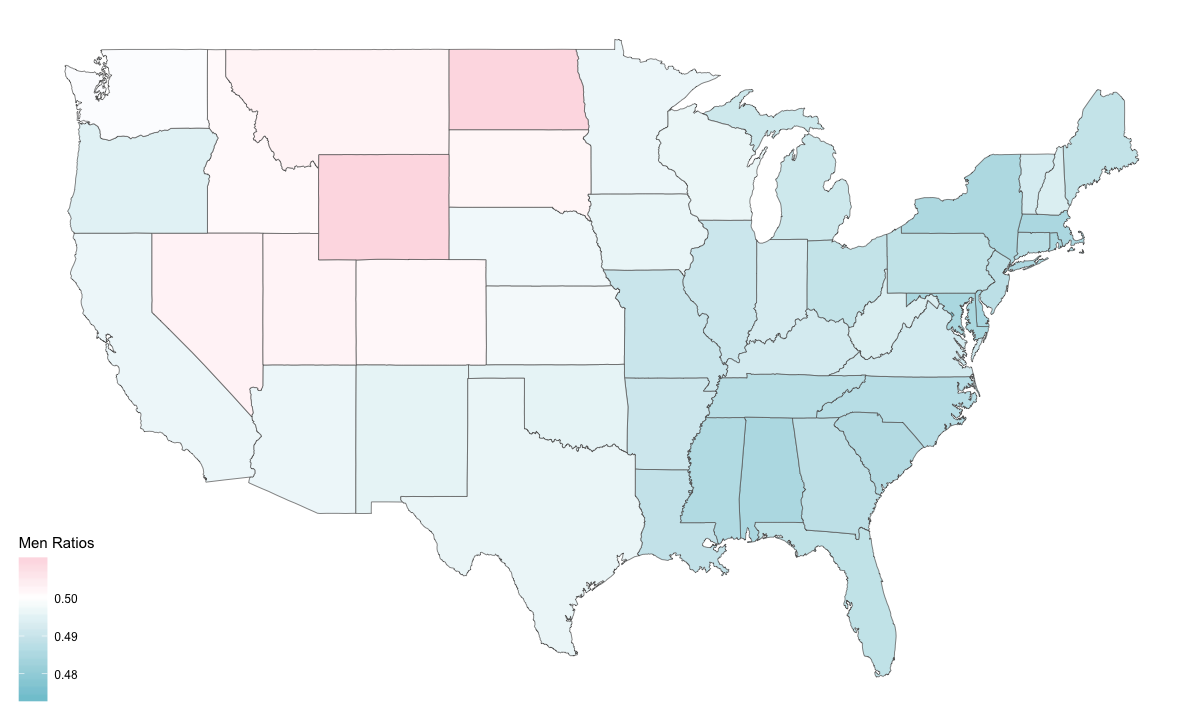

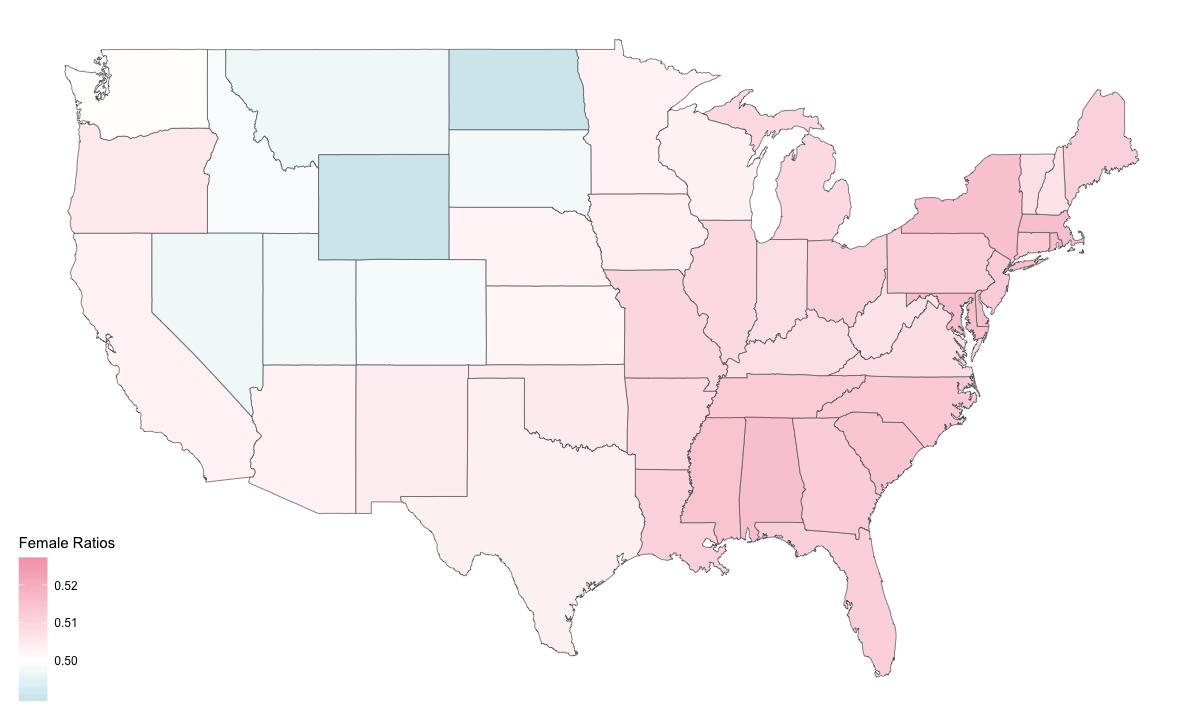

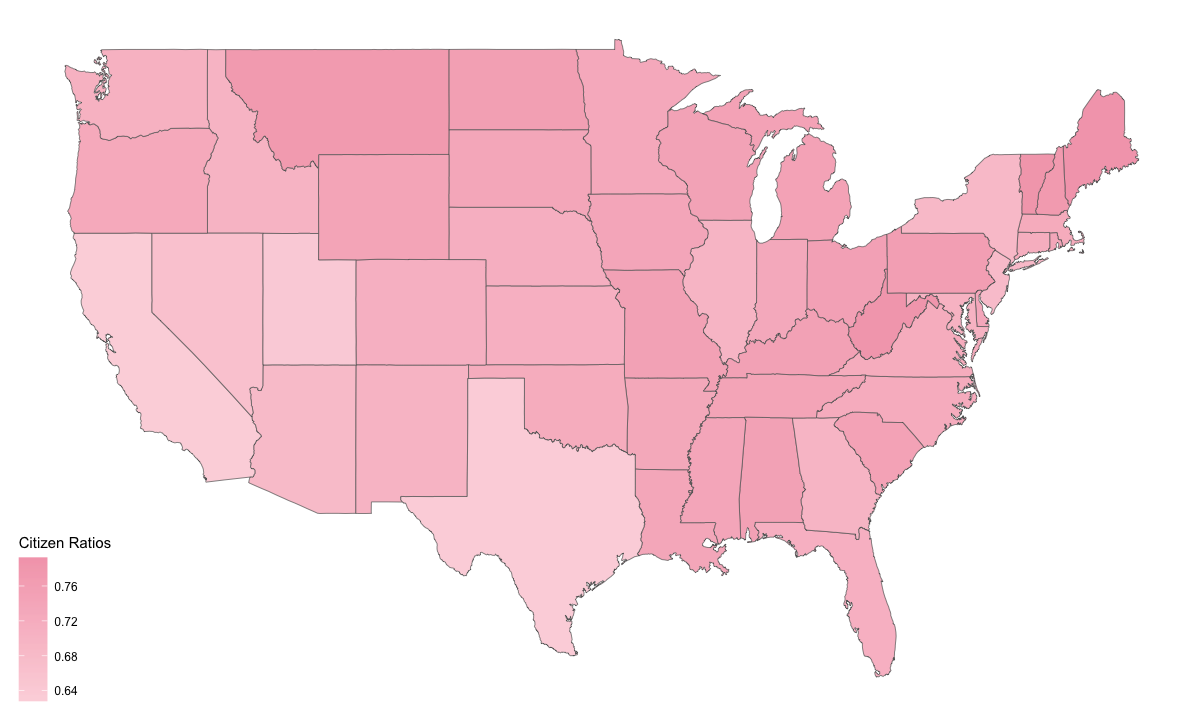

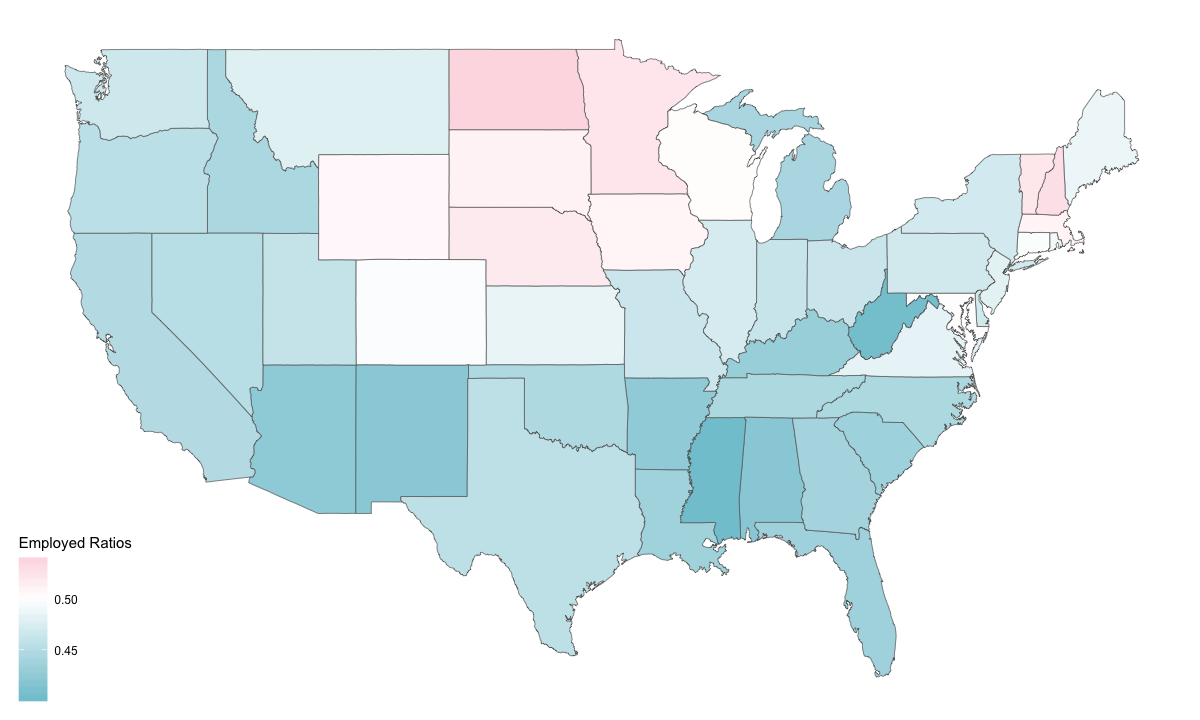

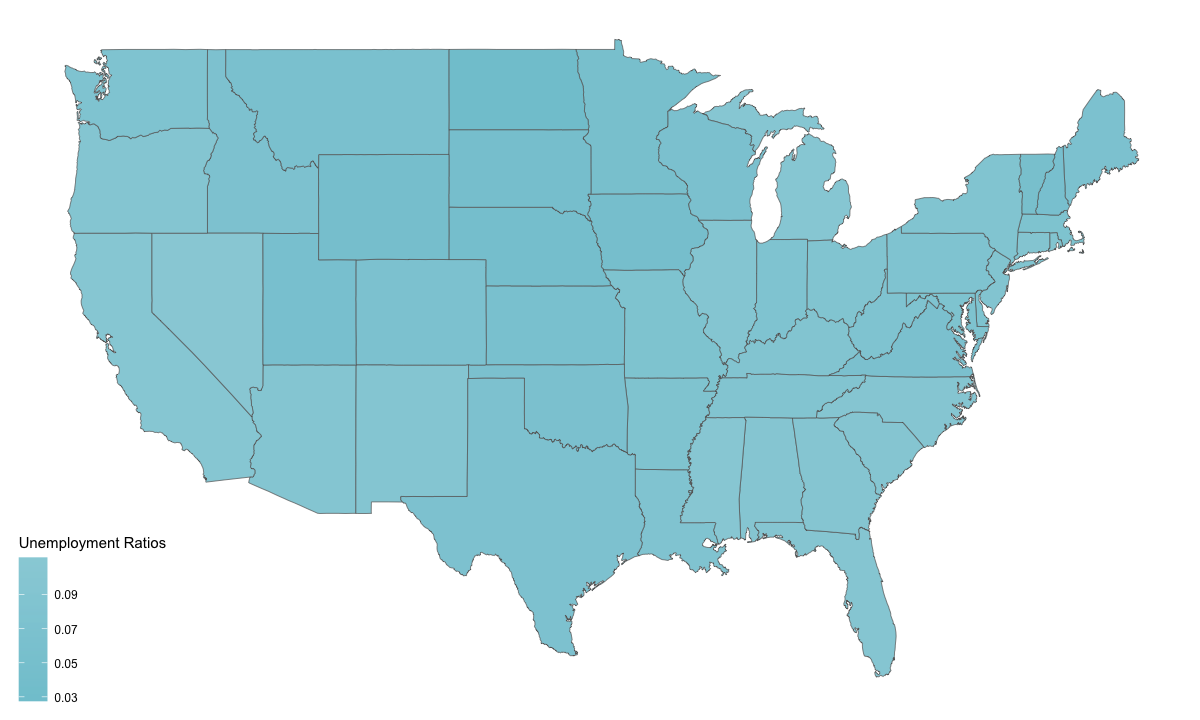

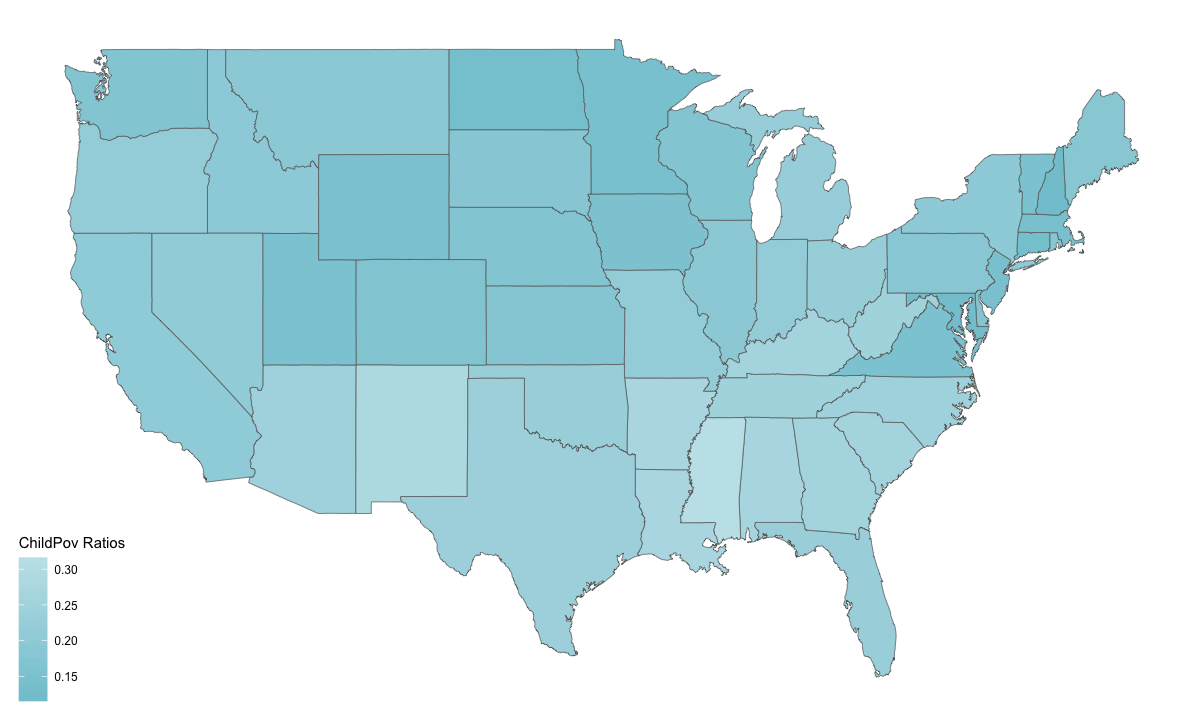

In [21]:
plot_map('Men', "Fig2: Male Ratio in different states", "Men Ratios")
plot_map('Women', "Fig2: Female Ratio in different states", "Female Ratios")
plot_map('Citizen', "Fig2: Citizen Ratio in different states", "Citizen Ratios")
plot_map('Employed', "Fig2: Employed Ratio in different states", "Employed Ratios")
plot_map('Unemployment', "Fig2: Unemployment Ratio in different states", "Unemployment Ratios")
plot_map('ChildPov', "Fig2: ChildPov Ratio in different states", "ChildPov Ratios")

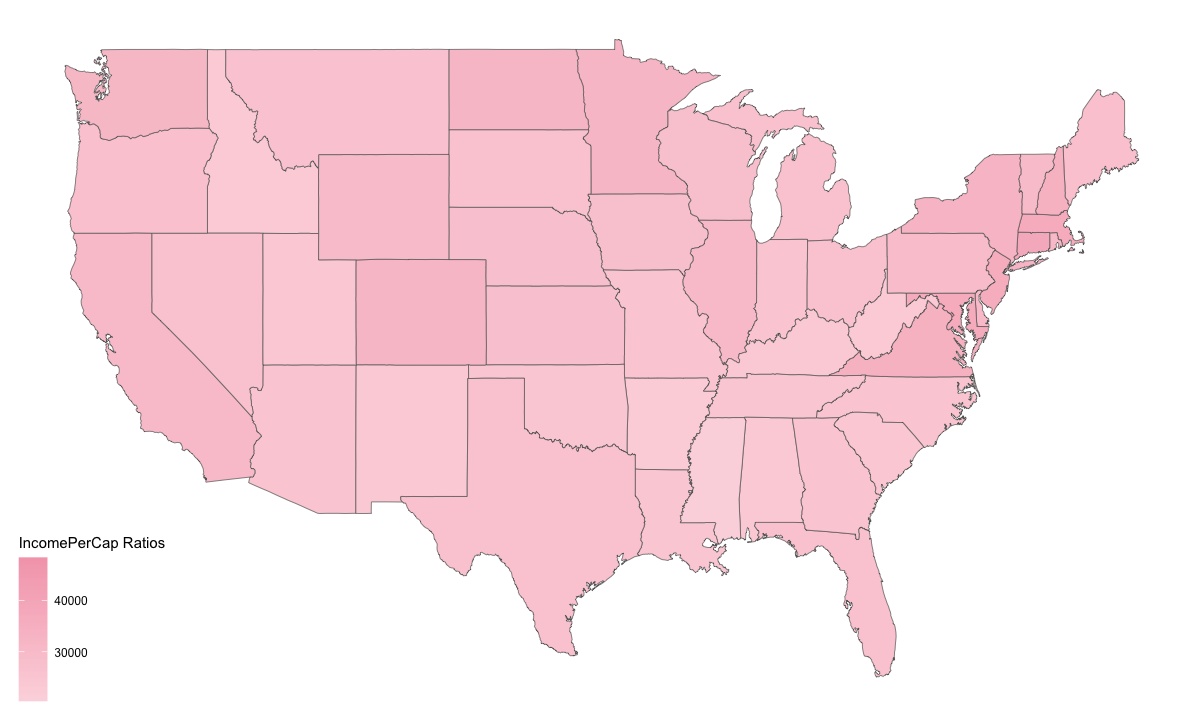

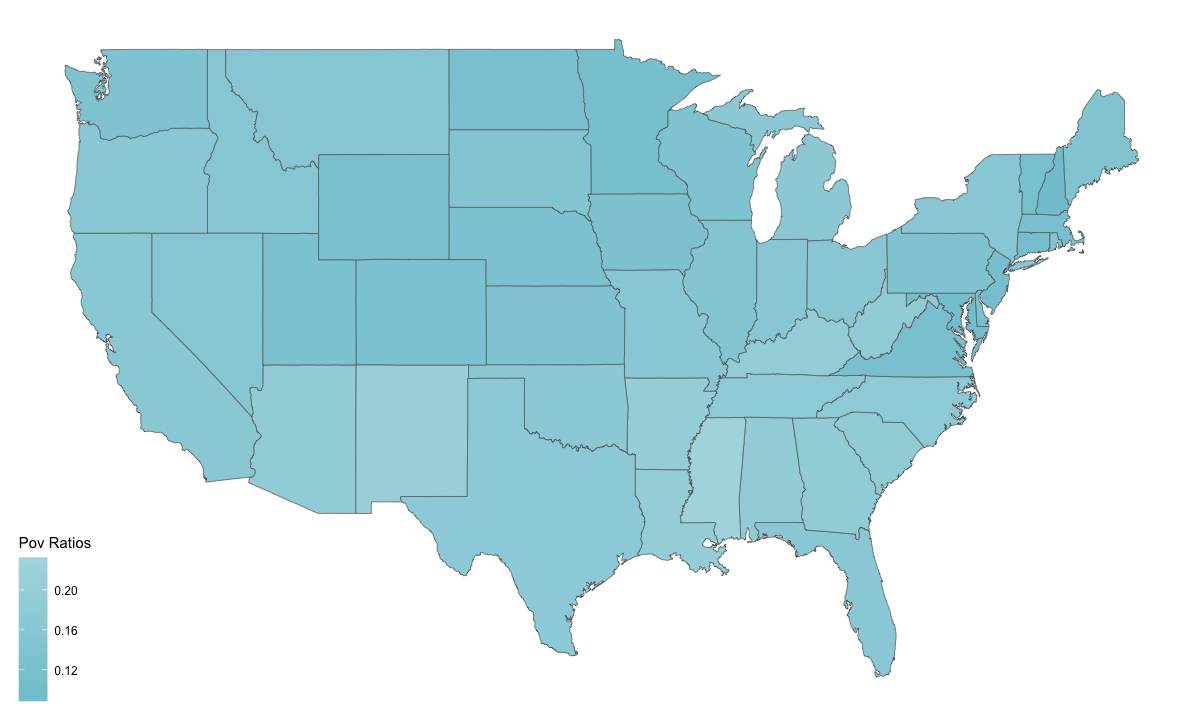

In [22]:
plot_map('IncomePerCap', "Fig2: IncomePerCap Ratio in different states", "IncomePerCap Ratios")
plot_map('Pov', "Fig2: Pov Ratio in different states", "Pov Ratios")

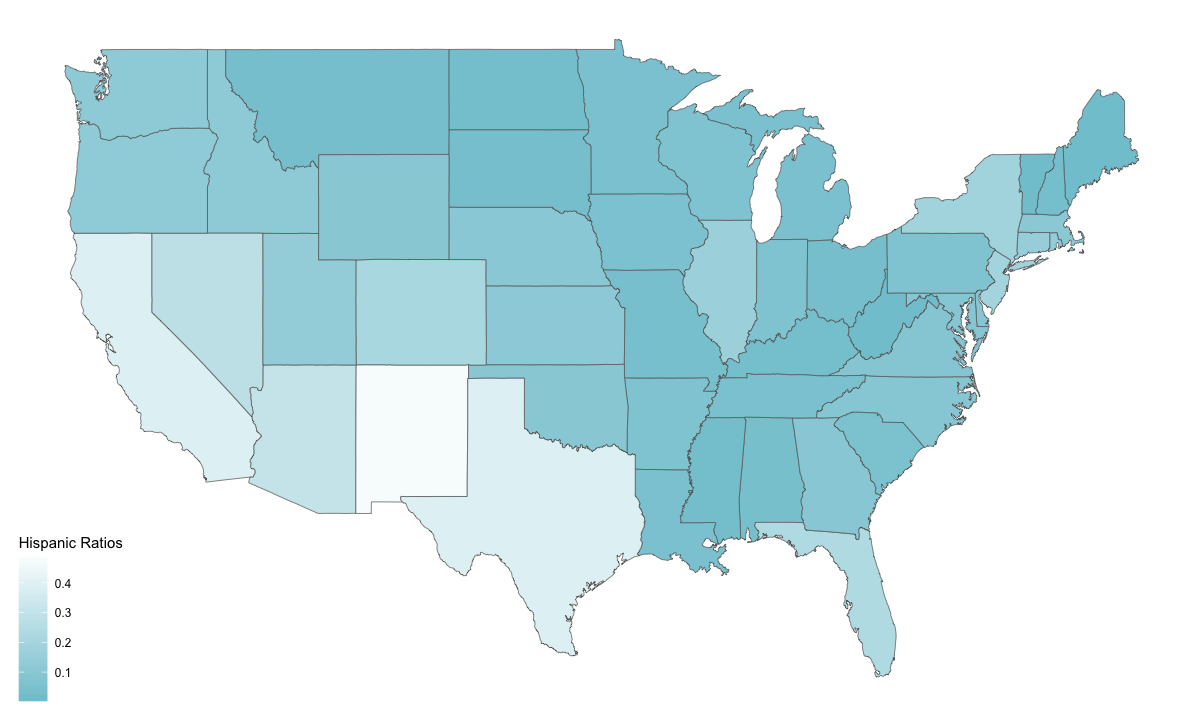

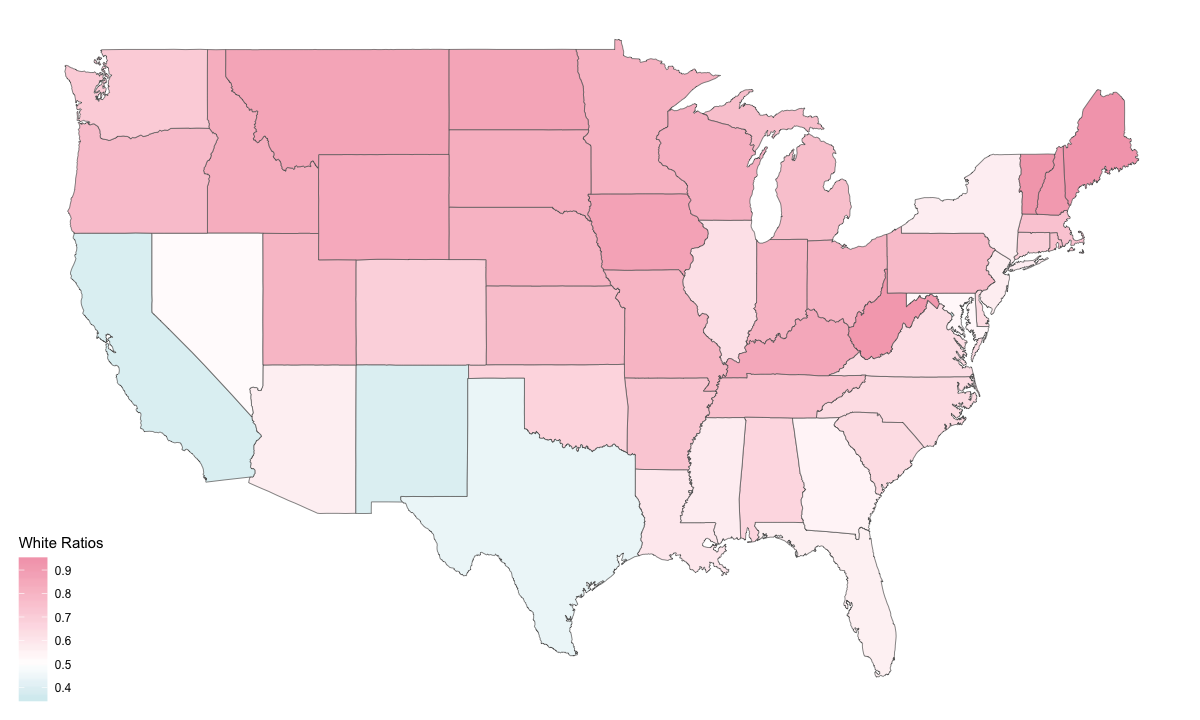

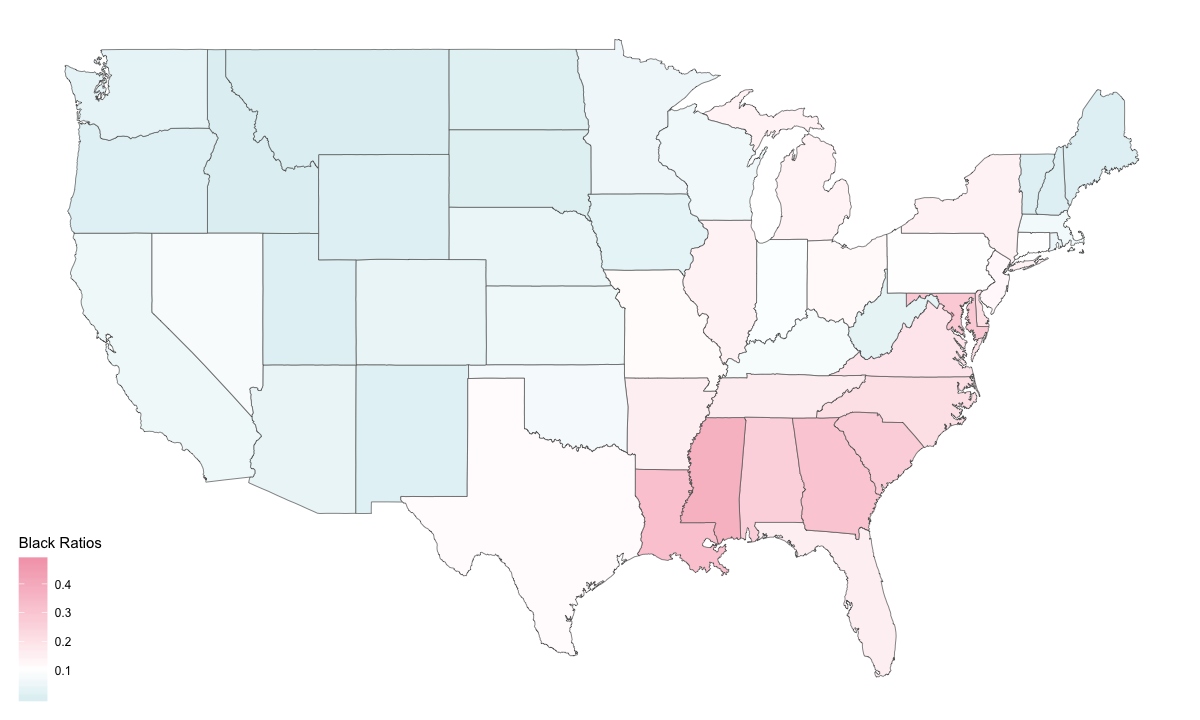

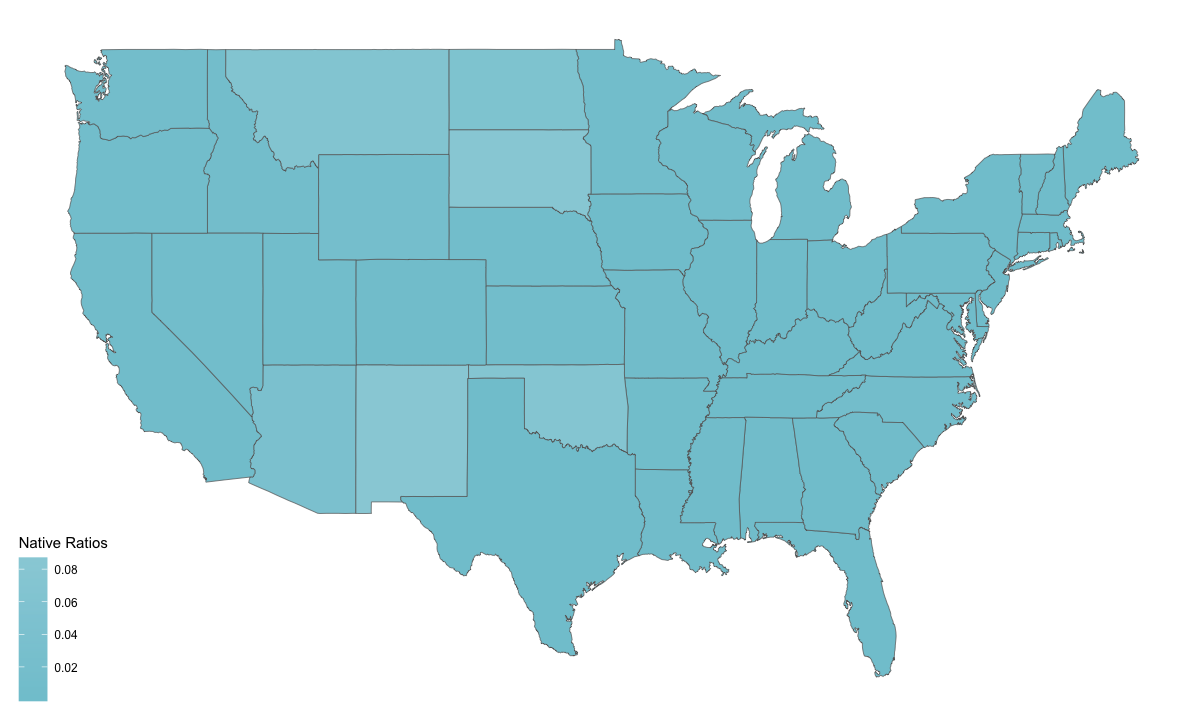

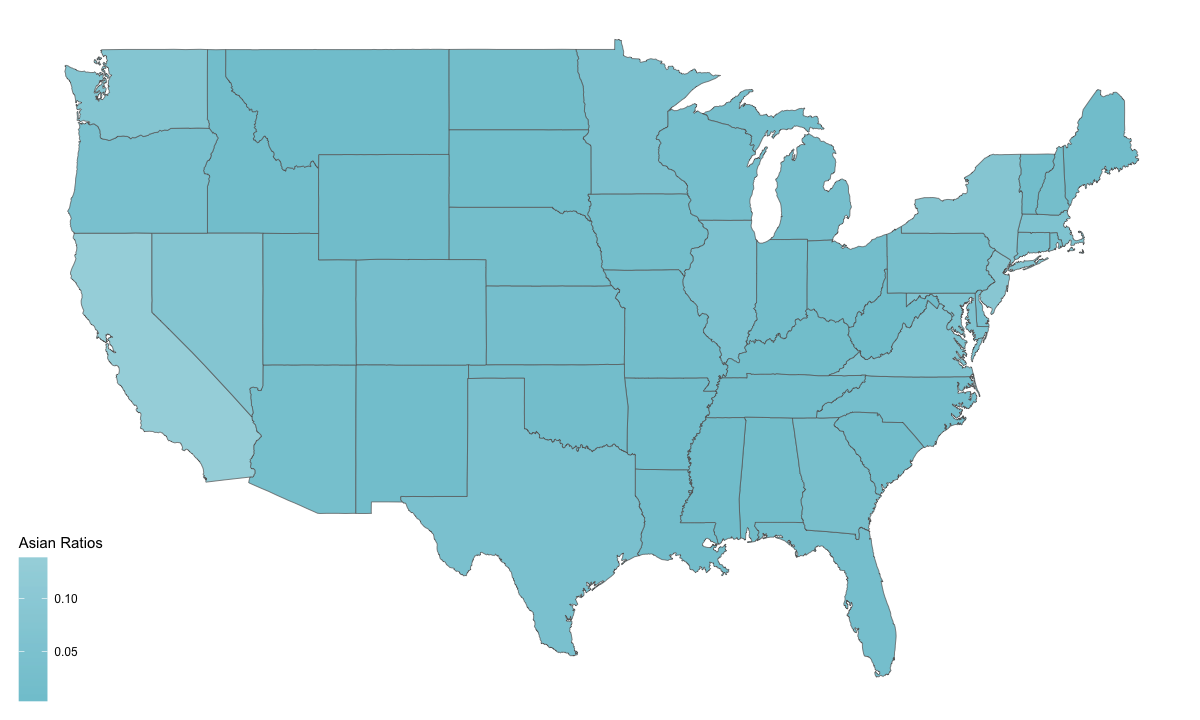

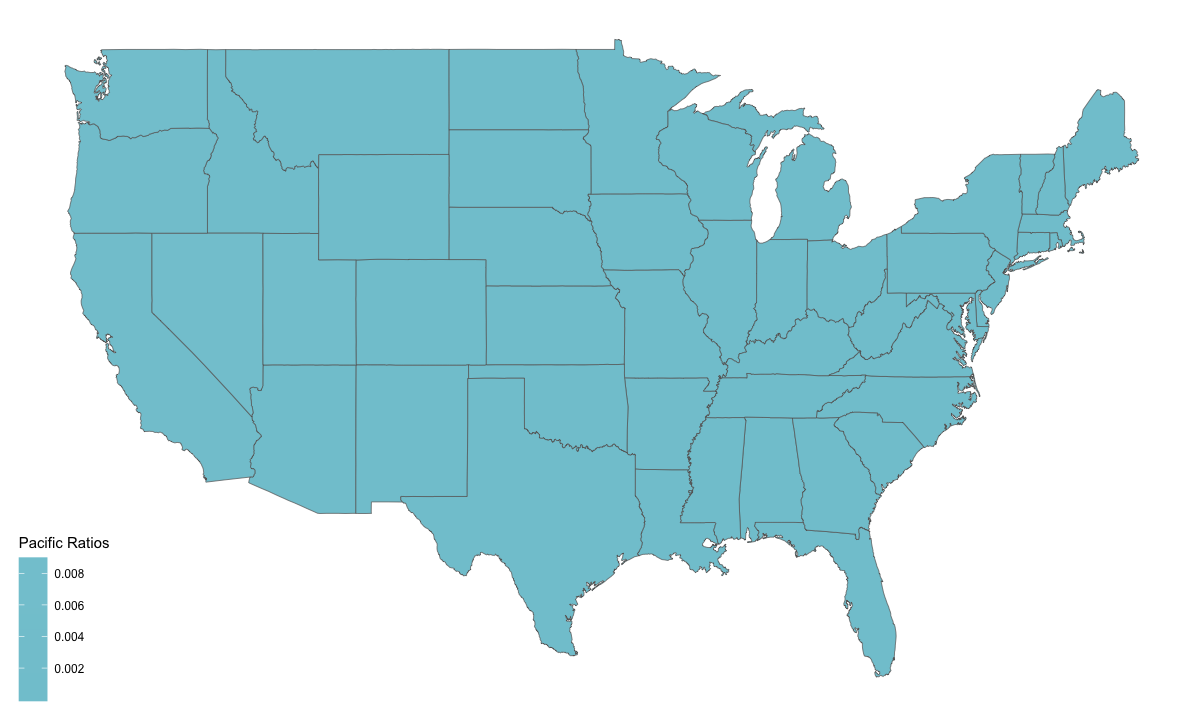

In [23]:
plot_map('Hispanic', "Fig3: Hispanic Ratio in different states", "Hispanic Ratios")
plot_map('White', "Fig3: White Ratio in different states", "White Ratios")
plot_map('Black', "Fig3: Black Ratio in different states", "Black Ratios", midpoint = 0.1)
plot_map('Native', "Fig3: Native Ratio in different states", "Native Ratios")
plot_map('Asian', "Fig3: Asian Ratio in different states", "Asian Ratios")
plot_map('Pacific', "Fig3: Pacific Ratio in different states", "Pacific Ratios")

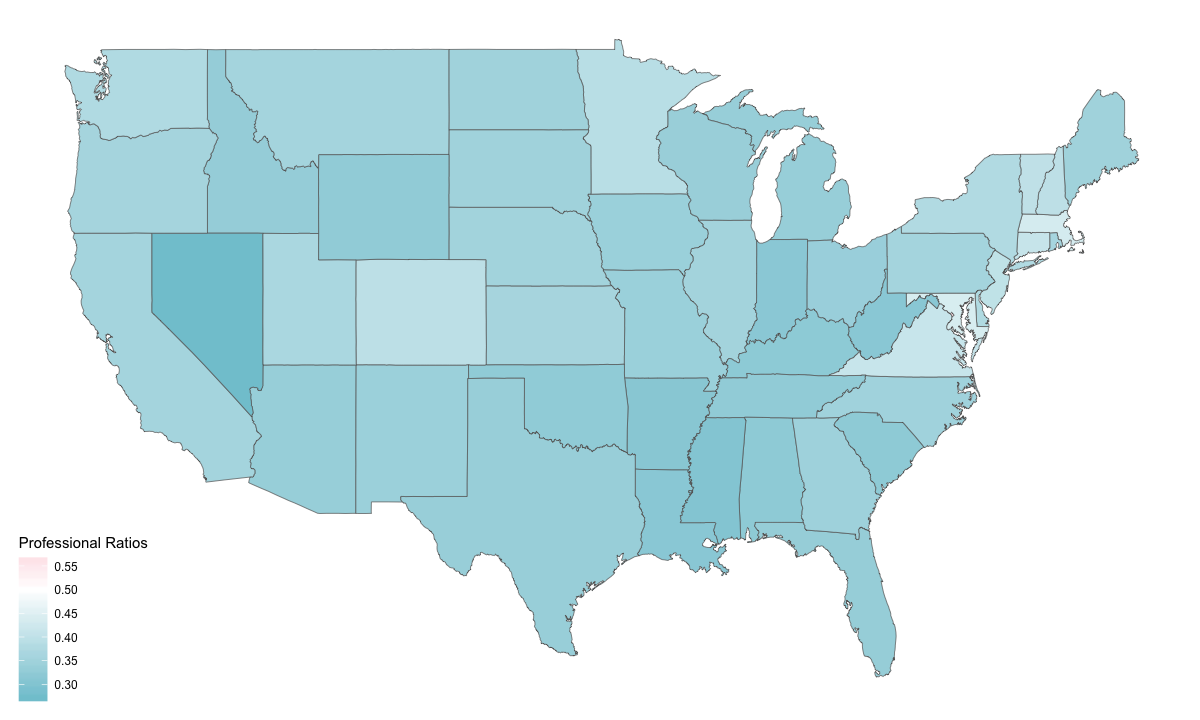

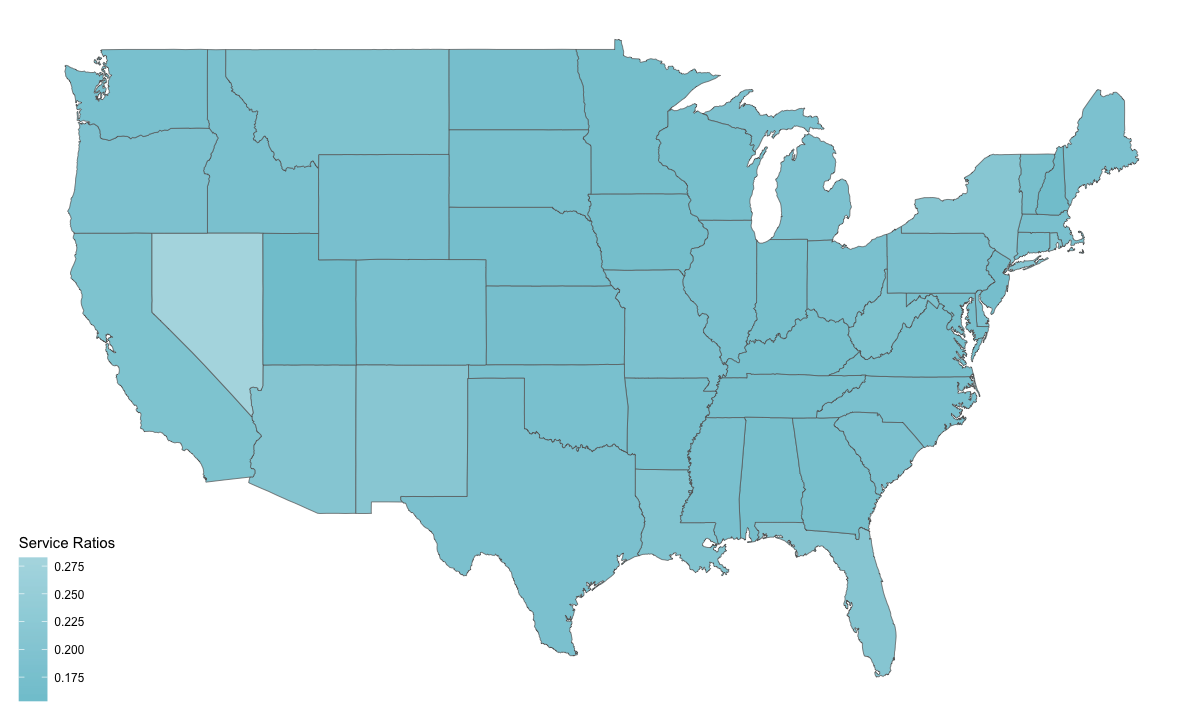

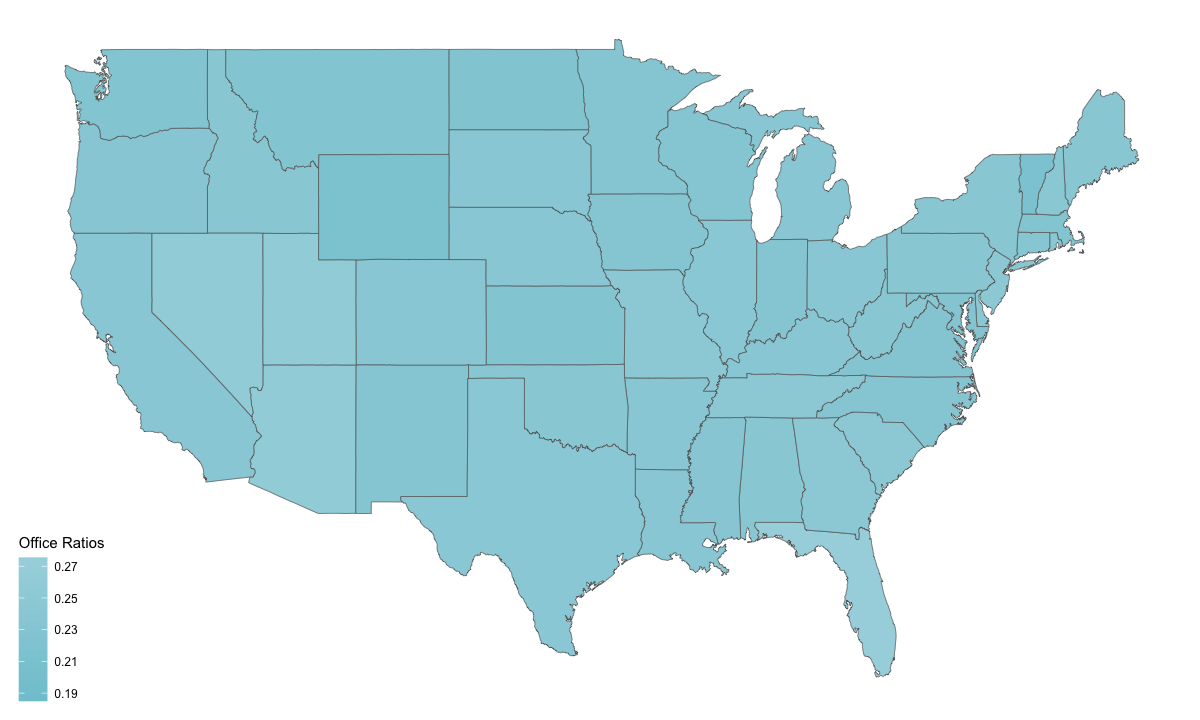

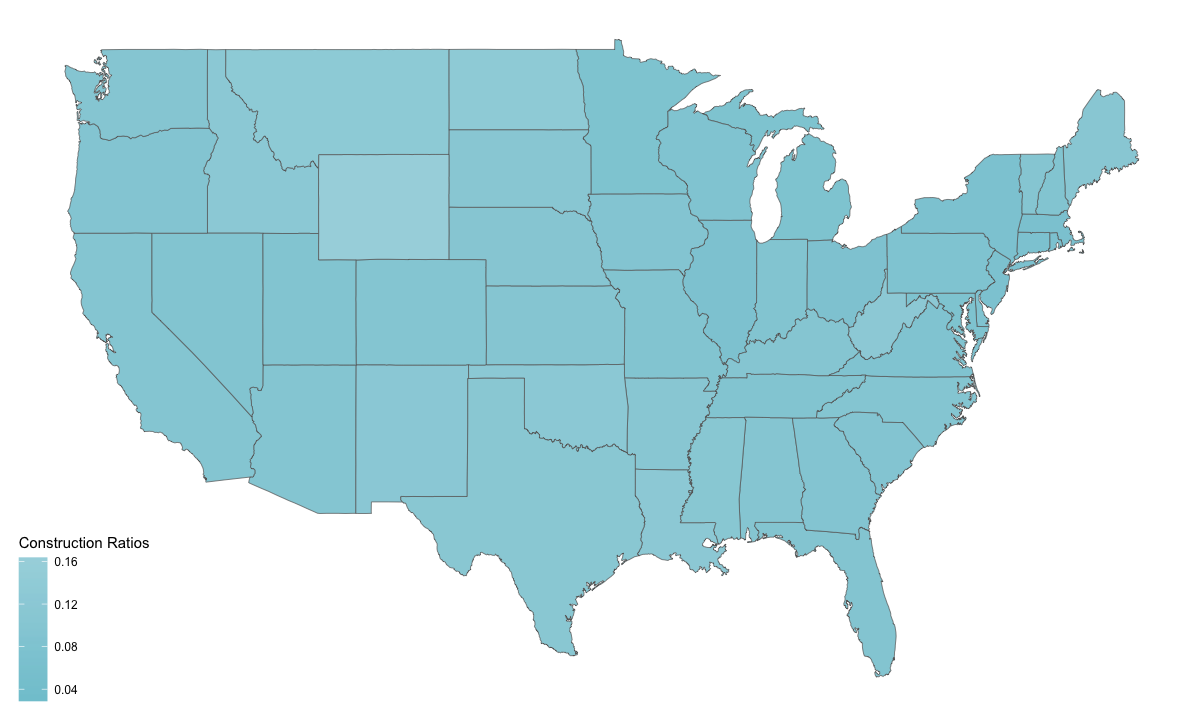

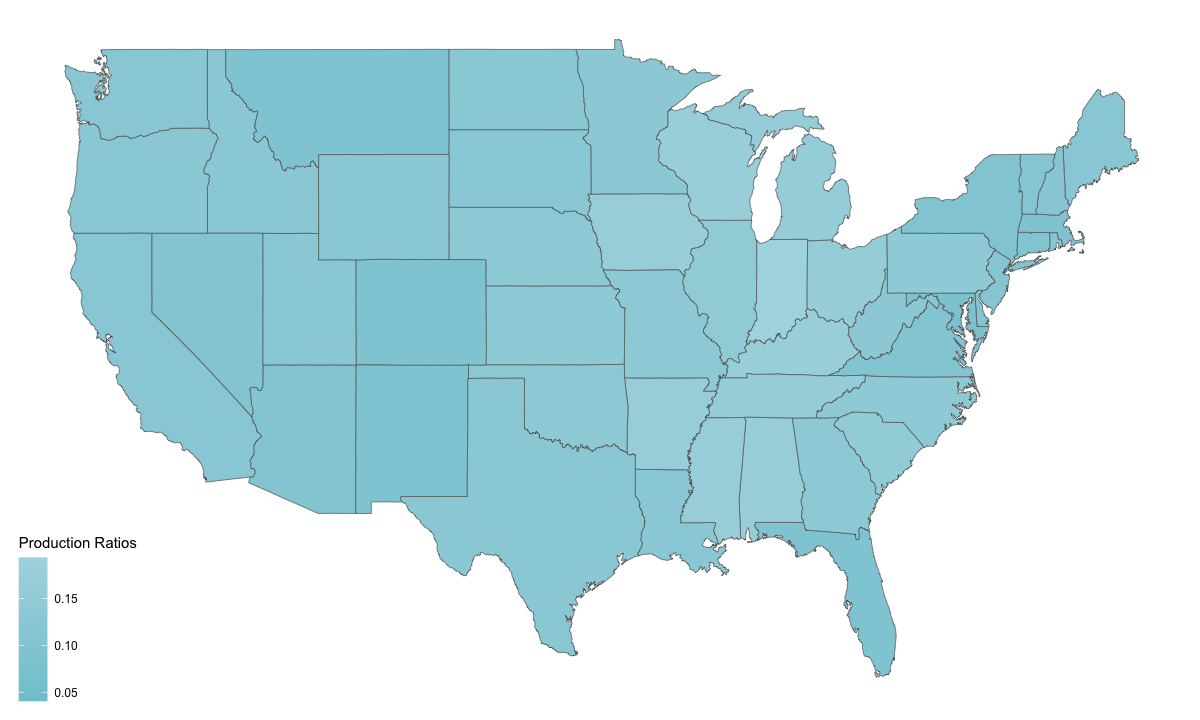

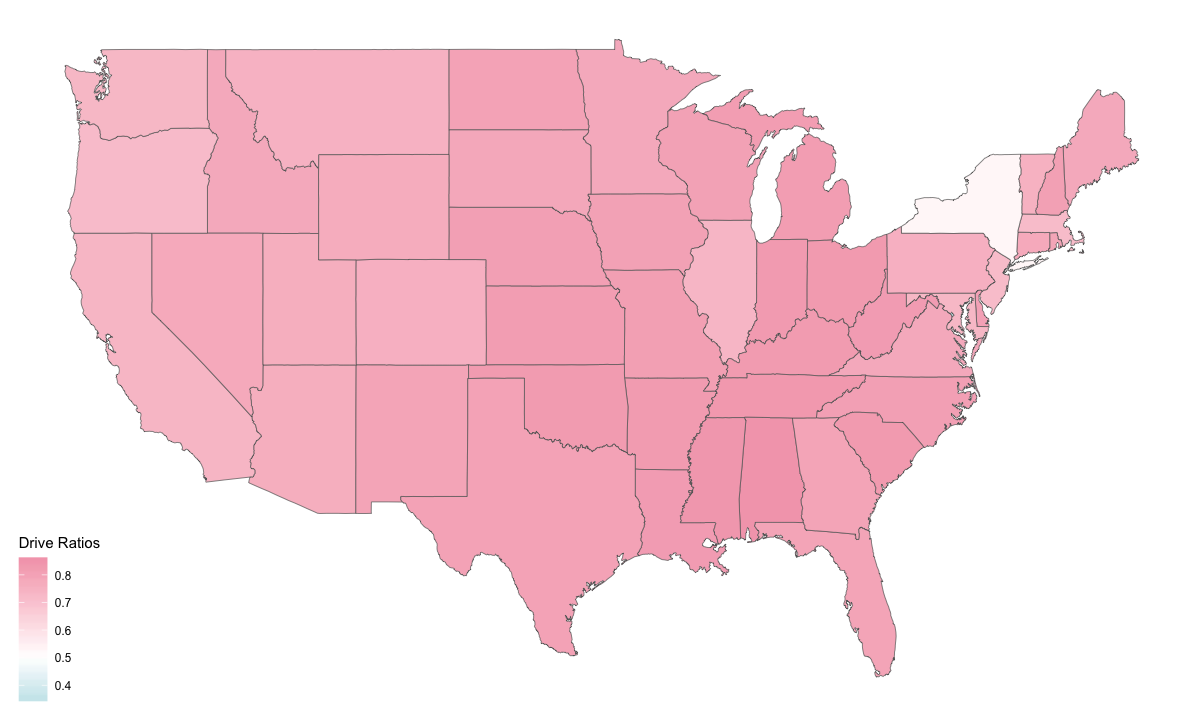

In [24]:
plot_map('Professional', "Fig3: Professional Ratio in different states", "Professional Ratios")
plot_map('Service', "Fig3: Service Ratio in different states", "Service Ratios")
plot_map('Office', "Fig3: Office Ratio in different states", "Office Ratios")
plot_map('Construction', "Fig3: Construction Ratio in different states", "Construction Ratios")
plot_map('Production', "Fig3: Production Ratio in different states", "Production Ratios")
plot_map('Drive', "Fig3: Drive Ratio in different states", "Drive Ratios")

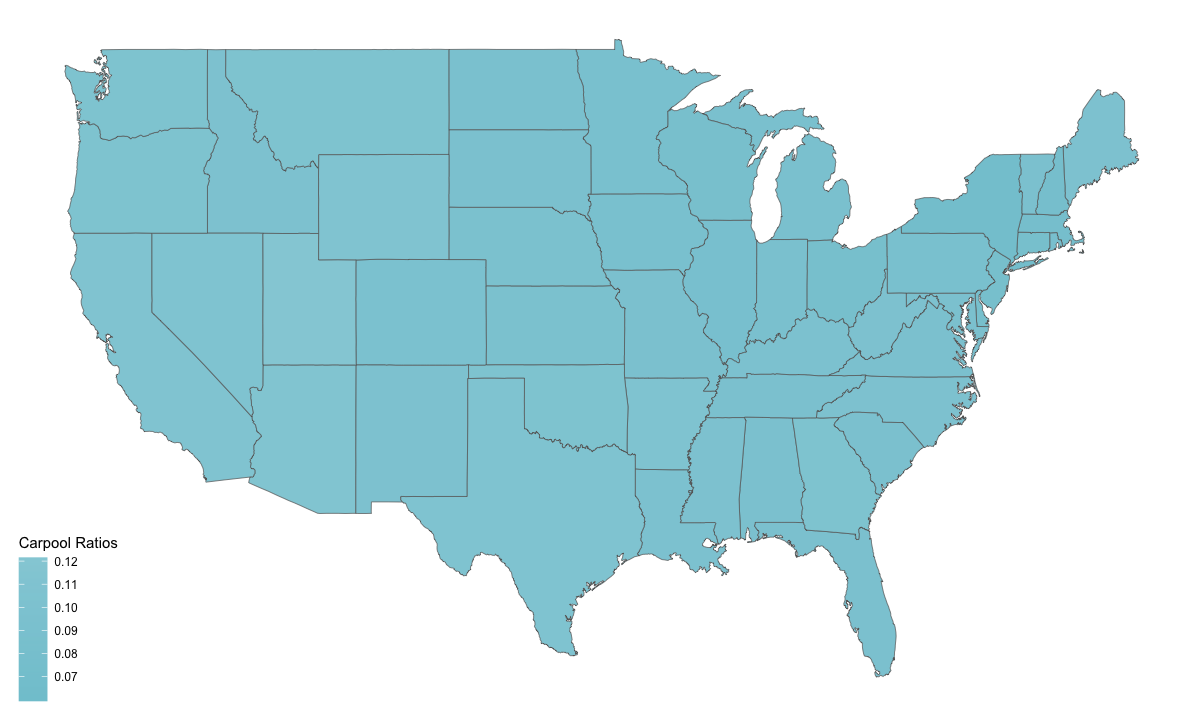

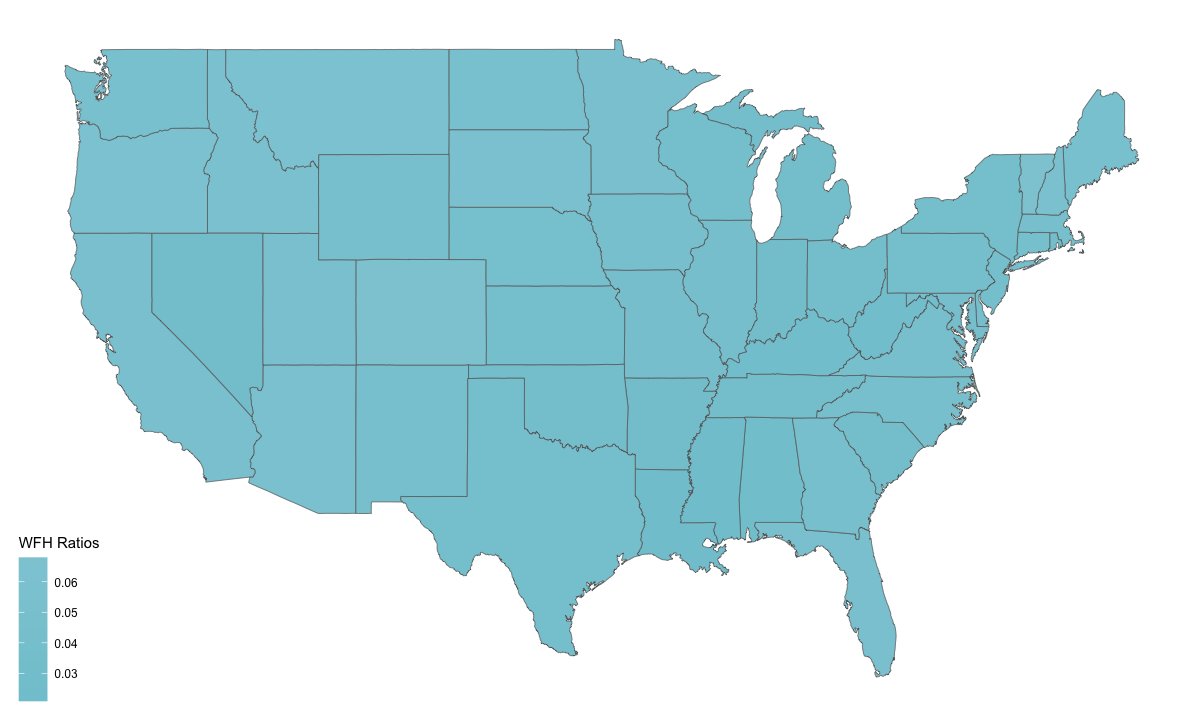

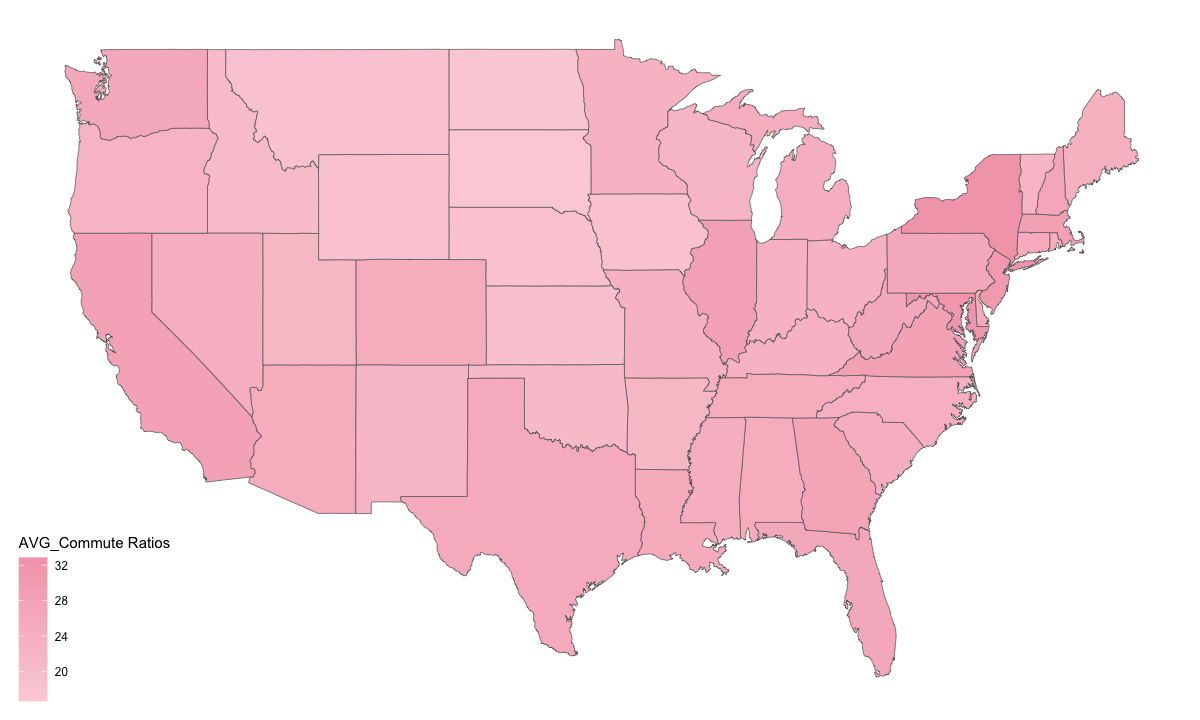

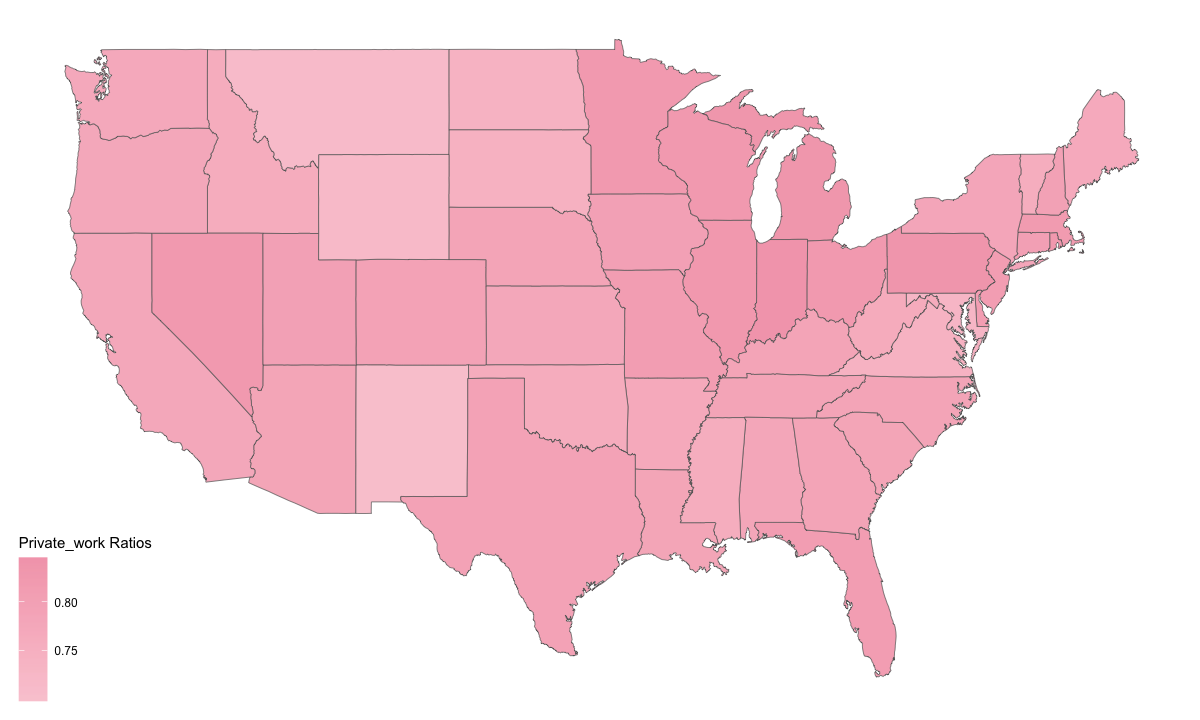

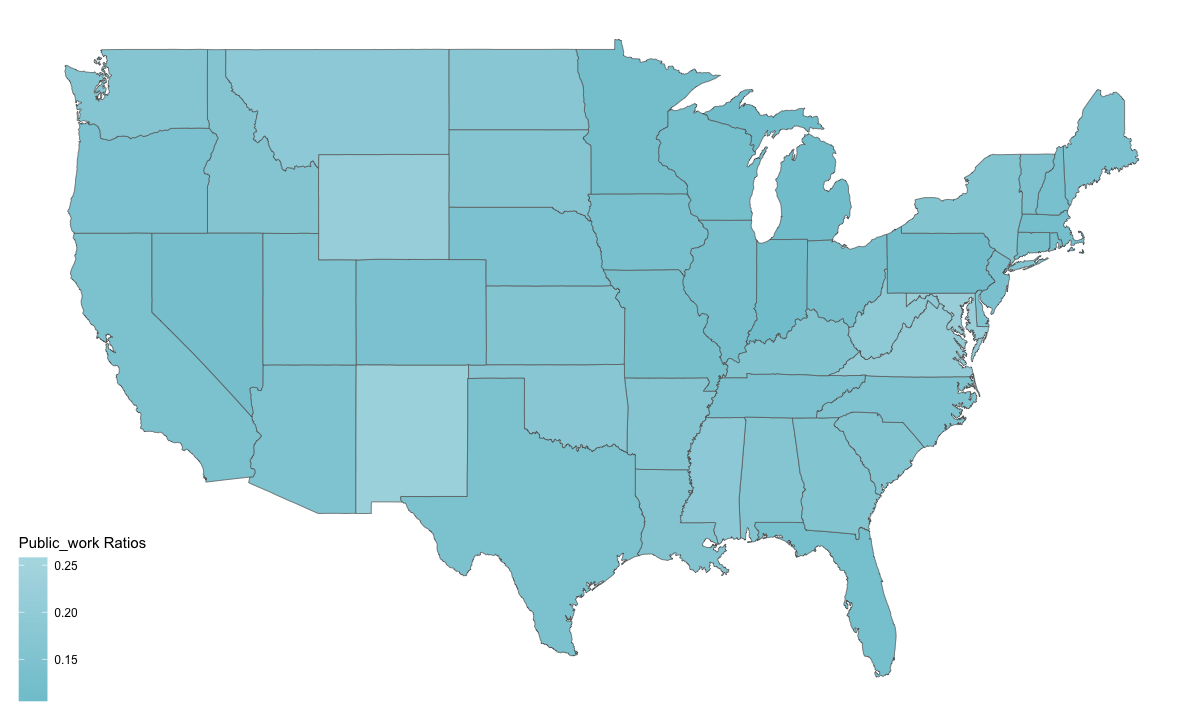

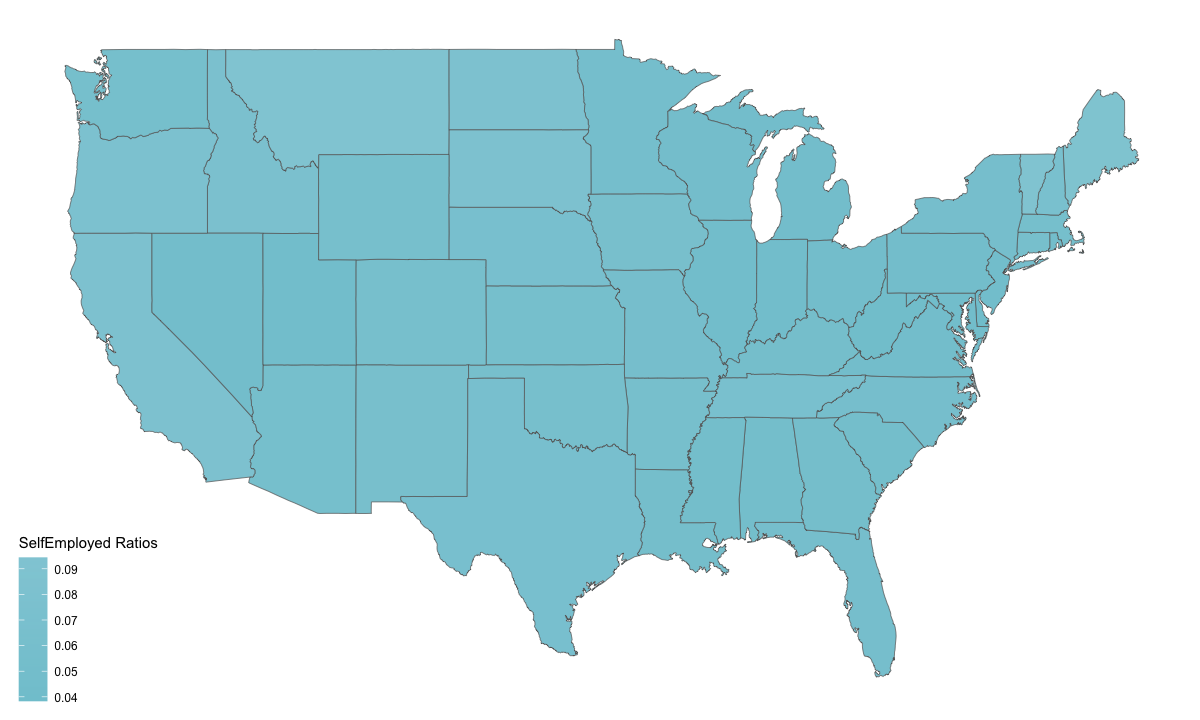

In [25]:
plot_map('Carpool', "Fig3: Carpool Ratio in different states", "Carpool Ratios")
plot_map('WFH', "Fig3: WFH Ratio in different states", "WFH Ratios")
plot_map('AVG_Commute', "Fig3: AVG_Commute Ratio in different states", "AVG_Commute Ratios")
plot_map('Private_work', "Fig3: Private_work Ratio in different states", "Private_work Ratios")
plot_map('Public_work', "Fig3: Public_work Ratio in different states", "Public_work Ratios")
plot_map('SelfEmployed', "Fig3: SelfEmployed Ratio in different states", "SelfEmployed Ratios")

In [26]:
detach(aggregated_data)

In [27]:
killings = read.csv('police_killings_cleaned.csv', header = TRUE)

In [28]:
killings$gender = factor(killings$gender)
killings$raceethnicity = factor(killings$raceethnicity)
killings$day = factor(killings$day)
killings$city = factor(killings$city)
killings$cause = factor(killings$cause)
killings$armed = factor(killings$armed)
killings$county_bucket = factor(killings$county_bucket)
killings$nat_bucket = factor(killings$nat_bucket)

as.numeric.factor <- function(x) {as.numeric(levels(x))[x]}
killings$pov = as.numeric.factor(killings$pov)
killings$p_income = as.numeric.factor(killings$p_income)
killings$share_black = as.numeric.factor(killings$share_black)
killings$share_white = as.numeric.factor(killings$share_white)
killings$share_hispanic = as.numeric.factor(killings$share_hispanic)

Warning message in as.numeric.factor(killings$pov):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$p_income):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_black):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_white):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_hispanic):
“NAs introduced by coercion”

In [29]:
missingdata= killings[!complete.cases(killings),]


 Variables sorted by number of missings: 
             Variable       Count
        county_bucket 0.057815846
        streetaddress 0.008565310
          share_white 0.004282655
          share_black 0.004282655
       share_hispanic 0.004282655
             p_income 0.004282655
             h_income 0.004282655
          comp_income 0.004282655
           nat_bucket 0.004282655
                  pov 0.004282655
                urate 0.004282655
              college 0.004282655
                 name 0.000000000
                  age 0.000000000
               gender 0.000000000
        raceethnicity 0.000000000
                month 0.000000000
                  day 0.000000000
                 year 0.000000000
                 city 0.000000000
                state 0.000000000
             latitude 0.000000000
            longitude 0.000000000
             state_fp 0.000000000
            county_fp 0.000000000
             tract_ce 0.000000000
               geo_id 0.000000000
     

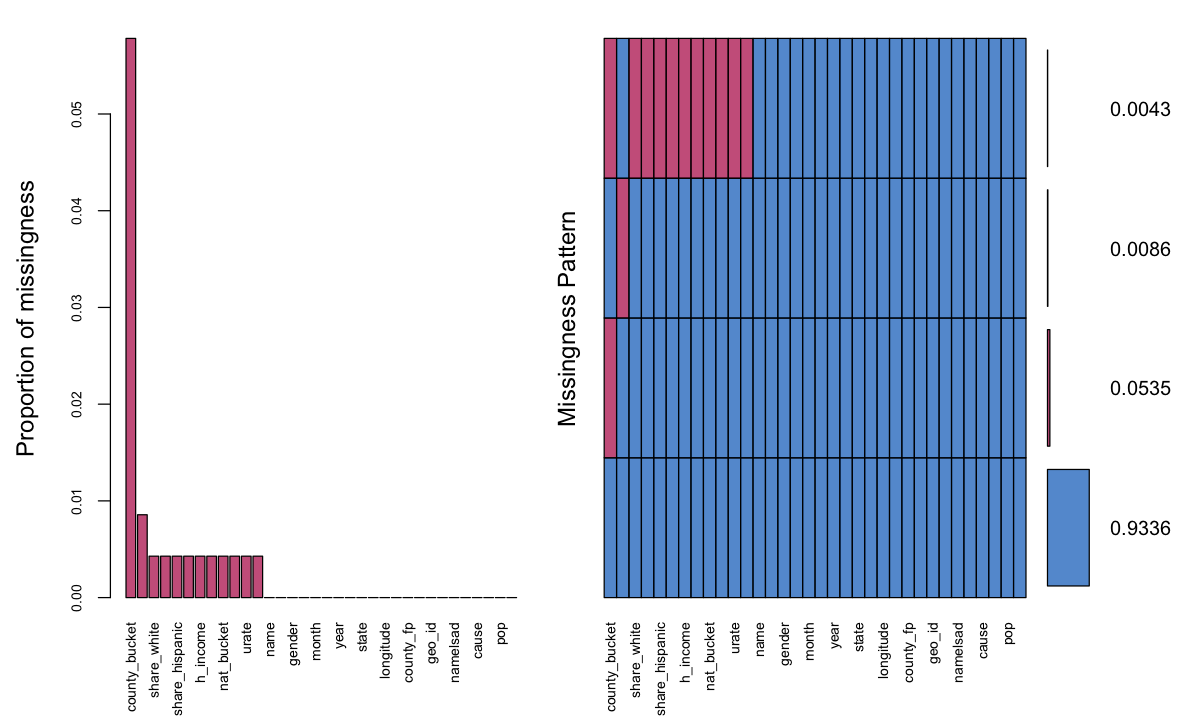

In [30]:
killings_aggr = aggr(killings,col=mdc(1:2), numbers=TRUE, sortVars=TRUE, cex.axis=.7, gap=3, ylab=c("Proportion of missingness","Missingness Pattern"))


In [31]:
attach(killings)

state <- killings %>% dplyr::select(state)
killing_subset <- data.frame(killings %>%  dplyr::select(raceethnicity),apply(state, 1, abbr2state))

killing_counts <- killing_subset %>% 
dplyr::group_by(apply.state..1..abbr2state.) %>%
tally()

killing_counts$apply.state..1..abbr2state. = tolower(killing_counts$apply.state..1..abbr2state.)

In [32]:
county <- killings %>% dplyr::select(county_id)
killing_subset <- data.frame(killings %>%  dplyr::select(raceethnicity),apply(state, 1, abbr2state))

killing_counts <- killing_subset %>% 
dplyr::group_by(apply.state..1..abbr2state.) %>%
tally()

killing_counts$apply.state..1..abbr2state. = tolower(killing_counts$apply.state..1..abbr2state.)
detach(killings)

In [33]:
killing_counts

apply.state..1..abbr2state. n 
1  alabama                      8
2  alaska                       2
3  arizona                     25
4  arkansas                     4
5  california                  74
6  colorado                    12
7  connecticut                  1
8  delaware                     2
9  district of columbia         1
10 florida                     29
11 georgia                     16
12 hawaii                       4
13 idaho                        4
14 illinois                    11
15 indiana                      8
16 iowa                         2
17 kansas                       6
18 kentucky                     7
19 louisiana                   11
20 maine                        1
21 maryland                    10
22 massachusetts                5
23 michigan                     9
24 minnesota                    6
25 mississippi                  6
26 missouri                    10
27 montana                      2
28 nebraska                     6
29 nevada                       3
30 new hampshire                1
31 new jersey                  11
32 new mexico                   5
33 new york                    14
34 north carolina              10
35 ohio                        10
36 oklahoma                    22
37 oregon                       8
38 pennsylvania                 7
39 south carolina               9
40 tennessee                    6
41 texas                       46
42 utah                         5
43 virginia                     9
44 washington                  11
45 west virginia                2
46 wisconsin                    5
47 wyoming                      1

In [34]:
joined_data = merge(aggregated_data,killing_counts, by.x = 'State', by.y='apply.state..1..abbr2state.',all.x = TRUE)

In [35]:
killings

name                    age gender raceethnicity   month    day year
1   A'donte Washington      17  Male   Black           February 23  2015
2   Aaron Rutledge          28  Male   White           April    2   2015
3   Aaron Siler             27  Male   White           March    14  2015
4   Aaron Valdez            26  Male   Hispanic/Latino March    11  2015
5   Adam Jovicic            30  Male   White           March    19  2015
6   Adam Reinhart           30  Male   White           March    7   2015
7   Adrian Hernandez        23  Male   Hispanic/Latino March    27  2015
8   Adrian Solis            36  Male   Hispanic/Latino March    26  2015
9   Alan Alverson           45  Male   White           January  28  2015
10  Alan James              32  Male   White           February 7   2015
11  Albert Hanson Jr        73  Male   White           April    26  2015
12  Alec Ouzounian          41  Male   White           May      12  2015
13  Alejandro Salazar       77  Male   Hispanic/Latino February 20  2015
14  Alexander Long          32  Male   White           February 25  2015
15  Alexander Myers         24  Male   White           April    6   2015
16  Alexander Rivera        40  Male   Hispanic/Latino May      30  2015
17  Alexia Christian        26  Female Black           April    30  2015
18  Alfredo Rials-Torres    55  Male   Hispanic/Latino May      19  2015
19  Alice Brown             25  Female White           March    17  2015
20  Alvin Haynes            58  Male   Black           January  26  2015
21  Amilcar Perez-Lopez     22  Male   Hispanic/Latino February 26  2015
22  Andre Murphy Sr         43  Male   Black           January  7   2015
23  Andres Lara-Rodriguez   22  Male   Hispanic/Latino February 13  2015
24  Andrew Driver           37  Male   White           March    13  2015
25  Andrew Jackson          27  Male   White           April    29  2015
26  Andrew Shipley          50  Male   White           March    17  2015
27  Andrew Toto             55  Male   White           January  21  2015
28  Andrew Valadez          27  Male   White           April    23  2015
29  Andrew Williams         49  Male   Black           March    6   2015
30  Andy Martinez           34  Male   Hispanic/Latino January  9   2015
⋮   ⋮                       ⋮   ⋮      ⋮               ⋮        ⋮   ⋮   
438 Tiffany Terry           40  Female White           January  30  2015
439 Tim Elliott             54  Male   Unknown         January  2   2015
440 Timothy Jones           28  Male   White           May      17  2015
441 Todd Allen Hodge        37  Male   White           January  21  2015
442 Todd Jamal Dye          21  Male   Black           April    24  2015
443 Tommy Smith             40  Male   White           January  12  2015
444 Tony Robinson           20  Male   Black           March    6   2015
445 Tony Ross               35  Male   White           March    6   2015
446 Troy Boyd               37  Male   White           March    15  2015
447 Tyrel Vick              35  Male   White           March    20  2015
448 Tyrell Larsen           32  Male   White           April    6   2015
449 Tyrone Ryerson          46  Male   Black           March    5   2015
450 Tyson Hubbard           35  Male   White           March    5   2015
451 Unknown                 77  Male   Unknown         January  16  2015
452 Unknown                 77  Female Unknown         May      25  2015
453 Unknown                 77  Male   White           June     1   2015
454 Victor Reyes            32  Male   Hispanic/Latino January  31  2015
455 Victor Terrazas         29  Male   Hispanic/Latino March    25  2015
456 Vincent Cordaro         58  Male   White           February 9   2015
457 Walter Brown III        30  Male   Black           March    24  2015
458 Walter Scott            51  Male   Black           April    4   2015
459 Wendell King            41  Male   White           January  29  2015
460 Wilber Castillo-Gongora 36  Male   Hispanic/Latino Februar

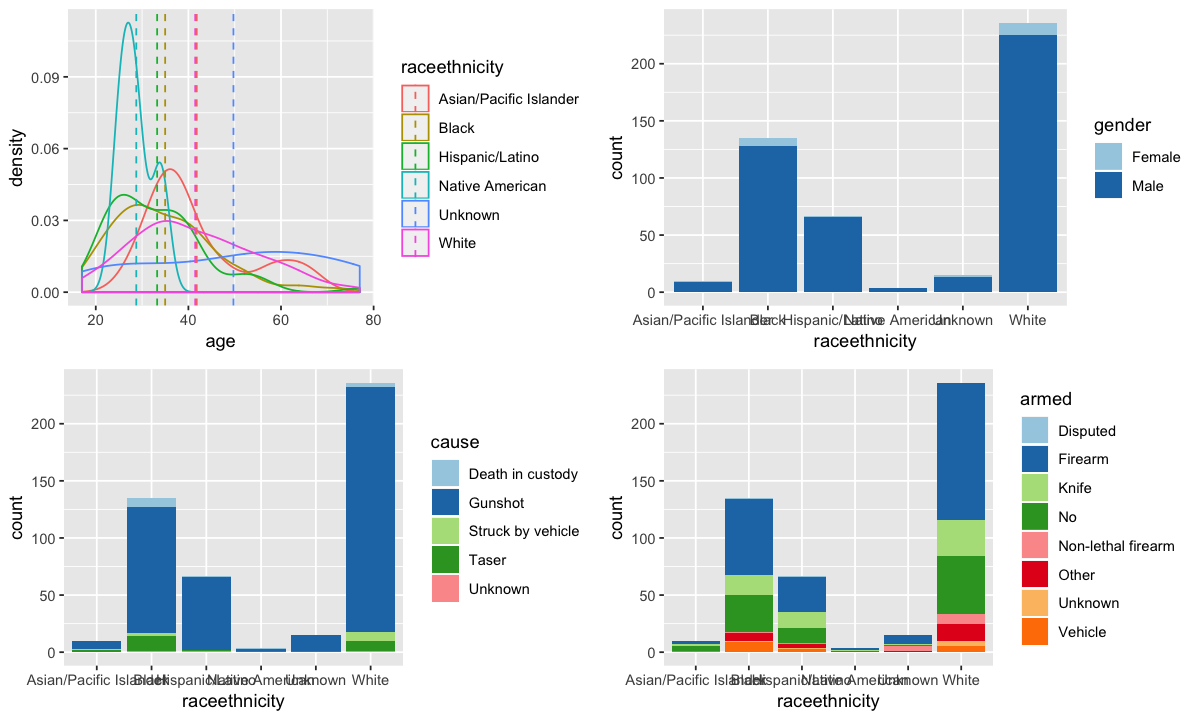

In [36]:
mu1 <- ddply(.data=killings, "raceethnicity", summarise, grp.mean=mean(age))
# Change density plot line colors by groups

p1<-ggplot(data=killings, aes(x=age, color=raceethnicity)) +
  geom_density()+
  # Add mean lines
  geom_vline(data=mu1, aes(xintercept=grp.mean, color=raceethnicity),
             linetype="dashed")

p2 = ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = gender)) +
  scale_fill_brewer(palette="Paired")

p3 = ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = cause)) +
  scale_fill_brewer(palette="Paired")

p4 = ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = armed)) +
  scale_fill_brewer(palette="Paired")
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [37]:
names(killings)
transpose(killings)

[1] "name"                 "age"                  "gender"              
 [4] "raceethnicity"        "month"                "day"                 
 [7] "year"                 "streetaddress"        "city"                
[10] "state"                "latitude"             "longitude"           
[13] "state_fp"             "county_fp"            "tract_ce"            
[16] "geo_id"               "county_id"            "namelsad"            
[19] "lawenforcementagency" "cause"                "armed"               
[22] "pop"                  "share_white"          "share_black"         
[25] "share_hispanic"       "p_income"             "h_income"            
[28] "county_income"        "comp_income"          "county_bucket"       
[31] "nat_bucket"           "pov"                  "urate"               
[34] "college"

V1                          V2                             
1  A'donte Washington          Aaron Rutledge                 
2  17                          28                             
3  Male                        Male                           
4  Black                       White                          
5  February                    April                          
6  23                          2                              
7  2015                        2015                           
8  Clearview Ln                300 block Iris Park Dr         
9  Millbrook                   Pineville                      
10 AL                          LA                             
11 32.529577                   31.3217392                     
12 -86.362829                  -92.4348602                    
13 1                           22                             
14 51                          79                             
15 30902                       11700                          
16 1051030902                  22079011700                    
17 1051                        22079                          
18 Census Tract 309.02         Census Tract 117               
19 Millbrook Police Department Rapides Parish Sheriff's Office
20 Gunshot                     Gunshot                        
21 No                          No                             
22 3779                        2769                           
23 60.5                        53.8                           
24 30.5                        36.2                           
25 5.6                         0.5                            
26 28375                       14678                          
27 51367                       27972                          
28 54766                       40930                          
29 0.937935946                 0.683410701                    
30 3                           2                              
31 3                           1                              
32 14.1                        28.8                           
33 0.097686375                 0.065723794                    
34 0.168509509                 0.111402359                    
   V3                        V4                          
1  Aaron Siler               Aaron Valdez                
2  27                        26                          
3  Male                      Male                        
4  White                     Hispanic/Latino             
5  March                     March                       
6  14                        11                          
7  2015                      2015                        
8  22nd Ave and 56th St      3000 Seminole Ave           
9  Kenosha                   South Gate                  
10 WI                        CA                          
11 42.5835597                33.9392976                  
12 -87.8357101               -118.2194634                
13 55                        6                           
14 59                        37                          
15 1200                      535607                      
16 55059001200               6037535607                  
17 55059                     6037                        
18 Census Tract 12           Census Tract 5356.07        
19 Kenosha Police Department South Gate Police Department
20 Gunshot                   Gunshot                     
21 No                        Firearm                     
22 4079                      4343                        
23 73.8                      1.2                         
24 7.7                       0.6                         
25 16.8                      98.8                        
26 25286                     17194                       
27 45365                     48295                       
28 54930                     55909                       
29 0.825869288               0.863814413                 
30 2                         3                           


In [38]:
killings = read.csv('police_killings_cleaned.csv', header = TRUE)

In [39]:
levels(killings$raceethnicity) <- c(levels(killings$raceethnicity), "Other")
killings[killings['raceethnicity']!= "Black" & killings['raceethnicity']!= "White", 'raceethnicity'] = "Other"

In [40]:
killings

name                    age gender raceethnicity month    day year
1   A'donte Washington      17  Male   Black         February 23  2015
2   Aaron Rutledge          28  Male   White         April     2  2015
3   Aaron Siler             27  Male   White         March    14  2015
4   Aaron Valdez            26  Male   Other         March    11  2015
5   Adam Jovicic            30  Male   White         March    19  2015
6   Adam Reinhart           30  Male   White         March     7  2015
7   Adrian Hernandez        23  Male   Other         March    27  2015
8   Adrian Solis            36  Male   Other         March    26  2015
9   Alan Alverson           45  Male   White         January  28  2015
10  Alan James              32  Male   White         February  7  2015
11  Albert Hanson Jr        73  Male   White         April    26  2015
12  Alec Ouzounian          41  Male   White         May      12  2015
13  Alejandro Salazar       77  Male   Other         February 20  2015
14  Alexander Long          32  Male   White         February 25  2015
15  Alexander Myers         24  Male   White         April     6  2015
16  Alexander Rivera        40  Male   Other         May      30  2015
17  Alexia Christian        26  Female Black         April    30  2015
18  Alfredo Rials-Torres    55  Male   Other         May      19  2015
19  Alice Brown             25  Female White         March    17  2015
20  Alvin Haynes            58  Male   Black         January  26  2015
21  Amilcar Perez-Lopez     22  Male   Other         February 26  2015
22  Andre Murphy Sr         43  Male   Black         January   7  2015
23  Andres Lara-Rodriguez   22  Male   Other         February 13  2015
24  Andrew Driver           37  Male   White         March    13  2015
25  Andrew Jackson          27  Male   White         April    29  2015
26  Andrew Shipley          50  Male   White         March    17  2015
27  Andrew Toto             55  Male   White         January  21  2015
28  Andrew Valadez          27  Male   White         April    23  2015
29  Andrew Williams         49  Male   Black         March     6  2015
30  Andy Martinez           34  Male   Other         January   9  2015
⋮   ⋮                       ⋮   ⋮      ⋮             ⋮        ⋮   ⋮   
438 Tiffany Terry           40  Female White         January  30  2015
439 Tim Elliott             54  Male   Other         January   2  2015
440 Timothy Jones           28  Male   White         May      17  2015
441 Todd Allen Hodge        37  Male   White         January  21  2015
442 Todd Jamal Dye          21  Male   Black         April    24  2015
443 Tommy Smith             40  Male   White         January  12  2015
444 Tony Robinson           20  Male   Black         March     6  2015
445 Tony Ross               35  Male   White         March     6  2015
446 Troy Boyd               37  Male   White         March    15  2015
447 Tyrel Vick              35  Male   White         March    20  2015
448 Tyrell Larsen           32  Male   White         April     6  2015
449 Tyrone Ryerson          46  Male   Black         March     5  2015
450 Tyson Hubbard           35  Male   White         March     5  2015
451 Unknown                 77  Male   Other         January  16  2015
452 Unknown                 77  Female Other         May      25  2015
453 Unknown                 77  Male   White         June      1  2015
454 Victor Reyes            32  Male   Other         January  31  2015
455 Victor Terrazas         29  Male   Other         March    25  2015
456 Vincent Cordaro         58  Male   White         February  9  2015
457 Walter Brown III        30  Male   Black         March    24  2015
458 Walter Scott            51  Male   Black         April     4  2015
459 Wendell King            41  Male   White         January  29  2015
460 Wilber Castillo-Gongora 36  Male   Other         February  5  2015
461 William 'Rusty' Smith   54  Male   White         March    10  2015
462 William Campbell        

In [41]:
killings

name                    age gender raceethnicity month    day year
1   A'donte Washington      17  Male   Black         February 23  2015
2   Aaron Rutledge          28  Male   White         April     2  2015
3   Aaron Siler             27  Male   White         March    14  2015
4   Aaron Valdez            26  Male   Other         March    11  2015
5   Adam Jovicic            30  Male   White         March    19  2015
6   Adam Reinhart           30  Male   White         March     7  2015
7   Adrian Hernandez        23  Male   Other         March    27  2015
8   Adrian Solis            36  Male   Other         March    26  2015
9   Alan Alverson           45  Male   White         January  28  2015
10  Alan James              32  Male   White         February  7  2015
11  Albert Hanson Jr        73  Male   White         April    26  2015
12  Alec Ouzounian          41  Male   White         May      12  2015
13  Alejandro Salazar       77  Male   Other         February 20  2015
14  Alexander Long          32  Male   White         February 25  2015
15  Alexander Myers         24  Male   White         April     6  2015
16  Alexander Rivera        40  Male   Other         May      30  2015
17  Alexia Christian        26  Female Black         April    30  2015
18  Alfredo Rials-Torres    55  Male   Other         May      19  2015
19  Alice Brown             25  Female White         March    17  2015
20  Alvin Haynes            58  Male   Black         January  26  2015
21  Amilcar Perez-Lopez     22  Male   Other         February 26  2015
22  Andre Murphy Sr         43  Male   Black         January   7  2015
23  Andres Lara-Rodriguez   22  Male   Other         February 13  2015
24  Andrew Driver           37  Male   White         March    13  2015
25  Andrew Jackson          27  Male   White         April    29  2015
26  Andrew Shipley          50  Male   White         March    17  2015
27  Andrew Toto             55  Male   White         January  21  2015
28  Andrew Valadez          27  Male   White         April    23  2015
29  Andrew Williams         49  Male   Black         March     6  2015
30  Andy Martinez           34  Male   Other         January   9  2015
⋮   ⋮                       ⋮   ⋮      ⋮             ⋮        ⋮   ⋮   
438 Tiffany Terry           40  Female White         January  30  2015
439 Tim Elliott             54  Male   Other         January   2  2015
440 Timothy Jones           28  Male   White         May      17  2015
441 Todd Allen Hodge        37  Male   White         January  21  2015
442 Todd Jamal Dye          21  Male   Black         April    24  2015
443 Tommy Smith             40  Male   White         January  12  2015
444 Tony Robinson           20  Male   Black         March     6  2015
445 Tony Ross               35  Male   White         March     6  2015
446 Troy Boyd               37  Male   White         March    15  2015
447 Tyrel Vick              35  Male   White         March    20  2015
448 Tyrell Larsen           32  Male   White         April     6  2015
449 Tyrone Ryerson          46  Male   Black         March     5  2015
450 Tyson Hubbard           35  Male   White         March     5  2015
451 Unknown                 77  Male   Other         January  16  2015
452 Unknown                 77  Female Other         May      25  2015
453 Unknown                 77  Male   White         June      1  2015
454 Victor Reyes            32  Male   Other         January  31  2015
455 Victor Terrazas         29  Male   Other         March    25  2015
456 Vincent Cordaro         58  Male   White         February  9  2015
457 Walter Brown III        30  Male   Black         March    24  2015
458 Walter Scott            51  Male   Black         April     4  2015
459 Wendell King            41  Male   White         January  29  2015
460 Wilber Castillo-Gongora 36  Male   Other         February  5  2015
461 William 'Rusty' Smith   54  Male   White         March    10  2015
462 William Campbell        

In [42]:
killings_sorted = killings %>% 
  group_by(state) %>% 
  dplyr::summarise(total_count = n()) %>%
  arrange(desc(total_count))
killings_sorted$state

[1] CA TX FL AZ OK GA NY CO IL LA NJ WA MD MO NC OH MI SC VA AL IN OR KY PA KS
[26] MN MS NE TN MA NM UT WI AR HI ID NV AK DE IA MT WV CT DC ME NH WY
47 Levels: AK AL AR AZ CA CO CT DC DE FL GA HI IA ID IL IN KS KY LA MA ... WY

In [43]:
killings$state

[1] AL LA WI CA OH AZ CA CA TX MI CA CA TX IN IN TN GA VA CA CA CA NE KS CA OK
 [26] OR NH CA FL TX CA MA TN AL GA PA GA GA CA WA AR GA OK FL IA CA TX GA NC NM
 [51] OK DC FL OH TX ID CA OR CA CO CA KS OR HI KY FL CA AZ KY FL MI FL TX CA CA
 [76] SC AZ KY AR OR GA VA WV UT TX MO GA FL MD NY NE TX AZ WA FL NE AZ NJ MD OK
[101] MD SC IL ID FL CO TX CA NC MI PA OK OH NY LA CT CA CA KS NC LA FL NY CA NY
[126] FL TX LA MI CA AZ CA GA VA IN NY IL MS SC IN MA TX AL AZ CA MD CA TX NJ AZ
[151] OK AZ OK TX AZ CA CA NM TX MD NY CA AL CA NV TX MO MD CA FL MA OK OK CA IN
[176] AL OK FL IN FL GA WV OH CA OK MS KY NJ TX NC MO IL FL MI FL NC UT TX SC CO
[201] NY TN MO CA OK OR CO LA WA NC FL LA NM NJ NC MD CA OH FL CA VA IL KY UT GA
[226] HI FL SC FL OH SC PA PA CO AZ LA AR TX AZ TN NV MS FL MT NM KS CA AK AZ OH
[251] NY CA AR TX FL TX CA CA WI IL FL OK GA CA AZ CA AZ TX IL AZ MN FL IL CA NY
[276] CO AZ TX AZ FL OK AZ GA ME DE IN NJ UT SC TX MI TX AK FL MO PA NC OR MD MT
[301] WA NY CO CA CA IN MN NE VA MO OR IL OK TN FL CA GA TN CA CA MI AZ CA KY ID
[326] KY NC MO MO HI CA PA DE NY CO GA TX WA CA WA TX CO VA LA OK MA CA IA GA AZ
[351] WY TX NJ LA CO CA CA CA MA CA TX CA SC TX CA NJ MN OK KS MN TX OK PA TX NY
[376] CA TX KS LA MD WA OR CA TX TX VA LA OH CA CA FL CA MS OK CA TX IL TX TX WA
[401] AZ CA NV AZ MN TX TX CA NJ MI CA AL IL AZ NJ HI CA MN AL CO AZ WA MS WI NJ
[426] OK MI OH MD OK FL MO OH MO UT CA TX NE WA NM CA CO IL WI TX MS OK ID WI NE
[451] TX TX NY TX CA NY VA SC TX TX AL NJ VA WA NC CA CA
47 Levels: AK AL AR AZ CA CO CT DC DE FL GA HI IA ID IL IN KS KY LA MA ... WY

In [44]:
killings$state = 
    factor(killings$state, levels = killings_sorted$state)

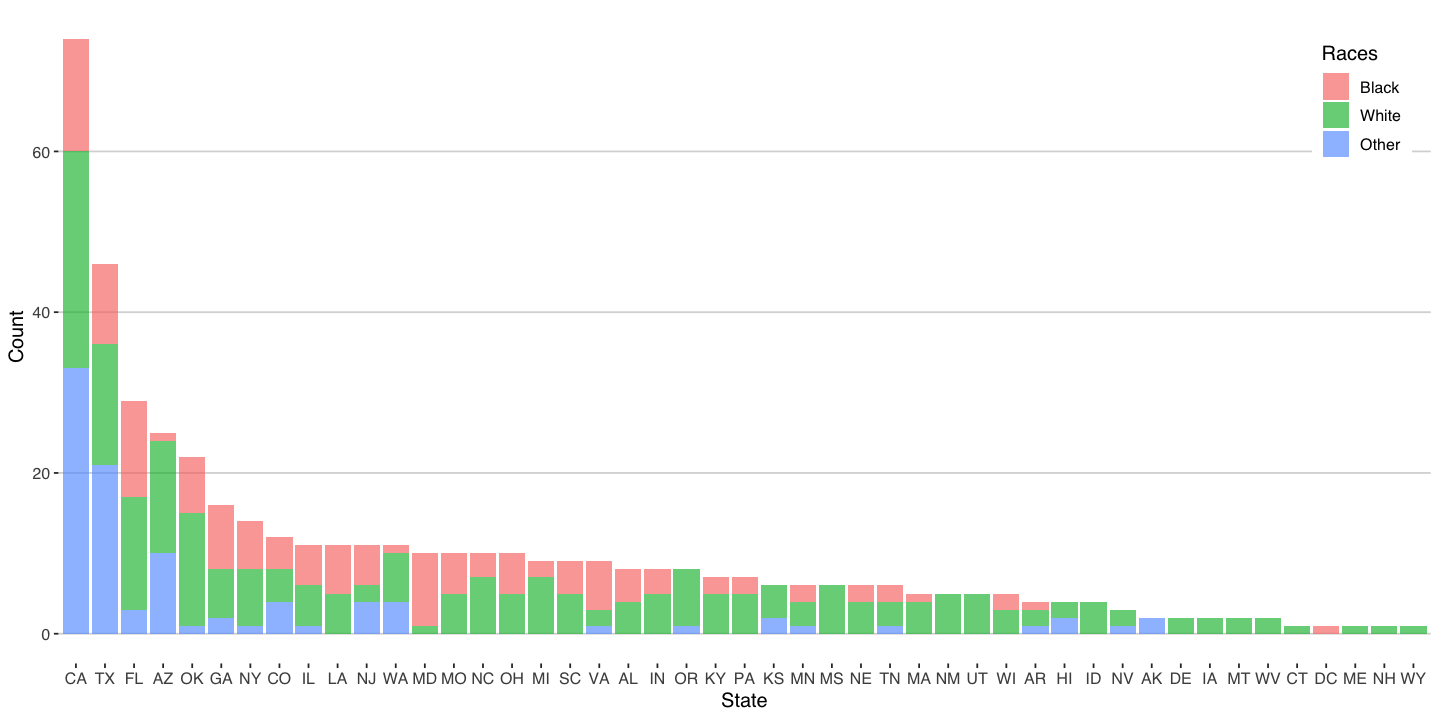

In [45]:
options(repr.plot.width=12, repr.plot.height=6)

ggplot(data = killings) +
    geom_bar(aes(state, fill=raceethnicity), alpha=0.65)+ 
    theme_hc() + 
      xlab("State") +
      ylab("Count")  +
      labs(fill="Races") + 
    theme(legend.position = c(0.95, 0.86)) 

In [46]:
killings[killings$cause == "Death in custody", "cause"]

[1] Death in custody Death in custody Death in custody Death in custody
 [5] Death in custody Death in custody Death in custody Death in custody
 [9] Death in custody Death in custody Death in custody Death in custody
[13] Death in custody Death in custody
Levels: Death in custody Gunshot Struck by vehicle Taser Unknown

In [47]:
levels(killings$cause)

[1] "Death in custody"  "Gunshot"           "Struck by vehicle"
[4] "Taser"             "Unknown"

In [48]:
levels(killings$cause) <- c(levels(killings$cause), "Custody", "Vehicle", "Other")
killings[killings$cause == "Death in custody", "cause"] = "Custody"
killings[killings$cause == "Struck by vehicle", "cause"] = "Vehicle"
killings[killings$cause == "Taser", "cause"] = "Other"
killings[killings$cause == "Unknown", "cause"] = "Other"

In [49]:
levels(killings$armed)

[1] "Disputed"           "Firearm"            "Knife"             
[4] "No"                 "Non-lethal firearm" "Other"             
[7] "Unknown"            "Vehicle"

In [50]:
# levels(killings$cause) <- c(levels(killings$armed), "Custody", "Vehicle", "Other")
killings[killings$armed == "Disputed", "armed"] = "Other"
killings[killings$armed == "Non-lethal firearm", "armed"] = "Other"
killings[killings$armed == "Unknown", "armed"] = "Other"
killings[killings$armed == "Vehicle", "armed"] = "Other"

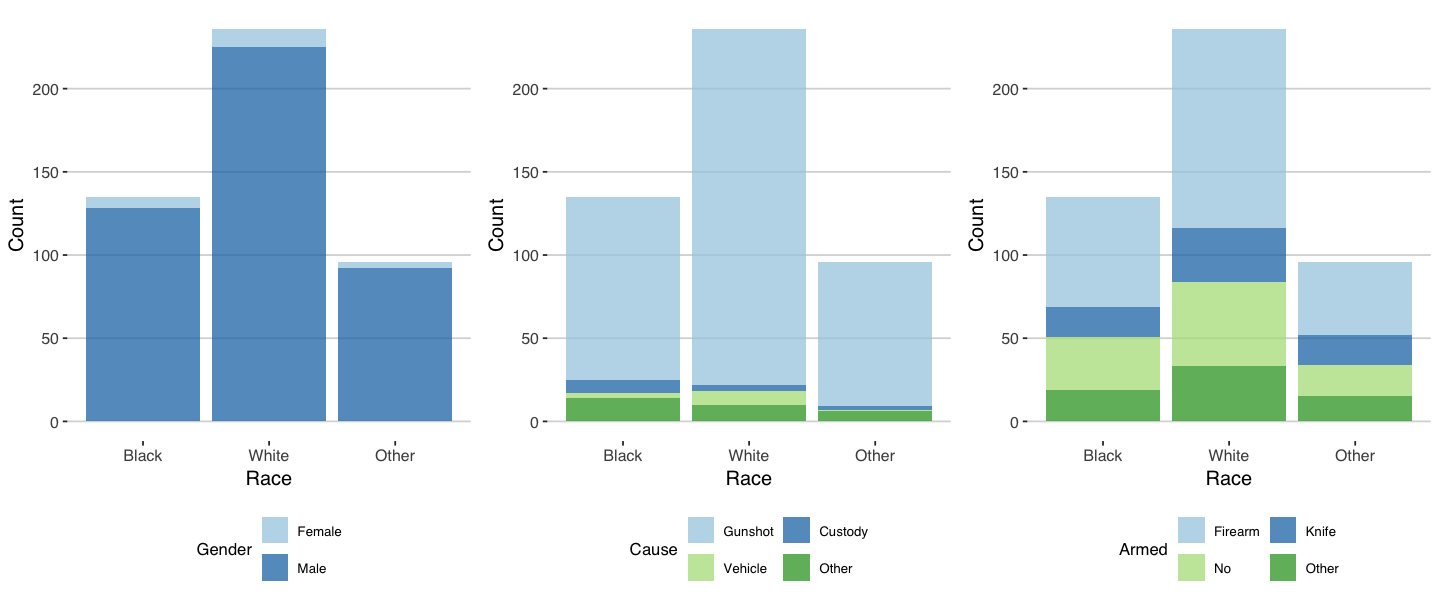

In [51]:
options(repr.plot.width=12, repr.plot.height=5)

g1 <- ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = gender), alpha=0.75) +
  scale_fill_brewer(palette="Paired") + #+ 
  theme_hc() +
      xlab("Race") +
      ylab("Count")  +
      labs(fill="Gender") + 
  theme(legend.title = element_text(size = 10), legend.text = element_text(size = 8)) +
  guides(fill=guide_legend(nrow=2,byrow=TRUE))
  #theme(legend.position = c(1, 0.5))

g2 <- ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = cause), alpha=0.75) +
  scale_fill_brewer(palette="Paired") + #+ 
  theme_hc() +
      xlab("Race") +
      ylab("Count")  +
      labs(fill="Cause") + 
  theme(legend.title = element_text(size = 10), legend.text = element_text(size = 8)) +
  guides(fill=guide_legend(nrow=2,byrow=TRUE))

g3 <- ggplot(data=killings,aes(raceethnicity)) +
  geom_bar(aes(fill = armed), alpha=0.75) +
  scale_fill_brewer(palette="Paired") + 
  theme_hc() +
      xlab("Race") +
      ylab("Count")  +
      labs(fill="Armed") + 
  theme(legend.title = element_text(size = 10), legend.text = element_text(size = 8))+
  guides(fill=guide_legend(nrow=2,byrow=TRUE))
grid.arrange(g1,g2,g3, widths=c(1,1,1))

In [52]:
names(aggregated_data)

[1] "State"        "Men"          "Women"        "Hispanic"     "White"       
 [6] "Black"        "Native"       "Asian"        "Pacific"      "Citizen"     
[11] "IncomePerCap" "Pov"          "ChildPov"     "Professional" "Service"     
[16] "Office"       "Construction" "Production"   "Drive"        "Carpool"     
[21] "Employed"     "WFH"          "AVG_Commute"  "Private_work" "Public_work" 
[26] "SelfEmployed" "Unemployment"

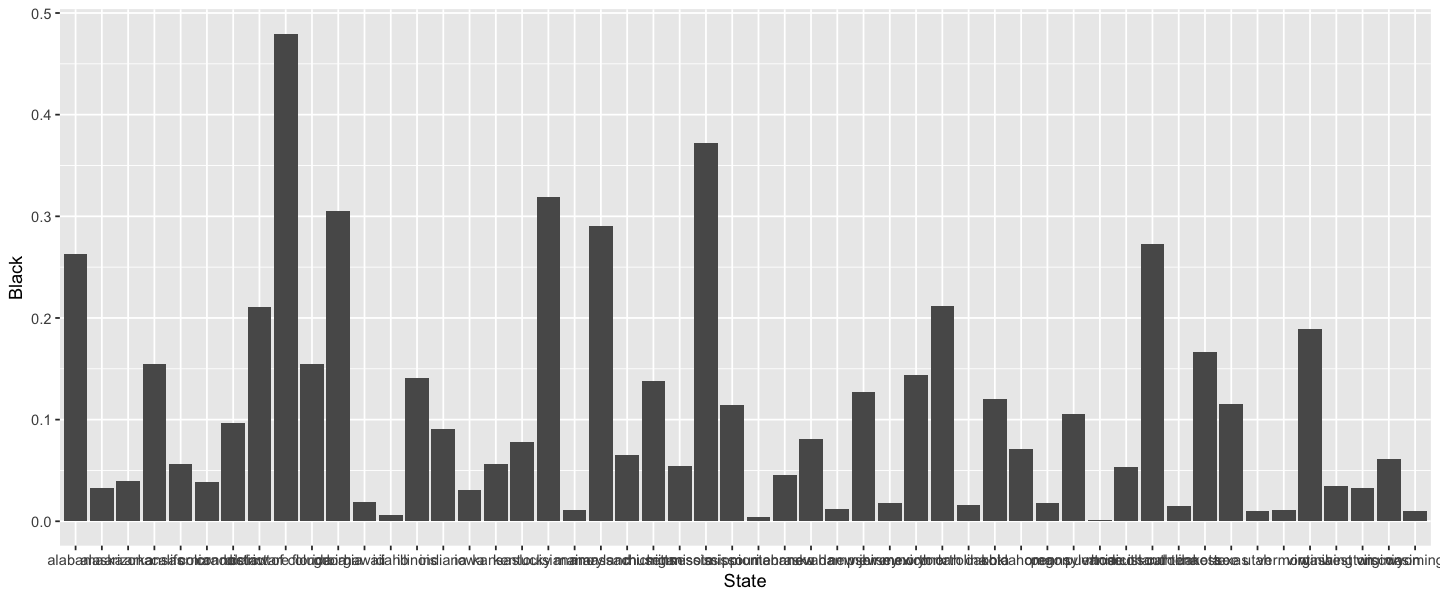

In [53]:
ggplot(data = joined_data, ) +
    geom_bar(aes(x = State, y = Black), stat="identity")

In [54]:
tmp = state.abb
state_abbr_names = c(tmp[1:8], 'D.C', tmp[9:38], 'PR', tmp[39:50])

In [55]:
new_joined = joined_data
new_joined$State = state_abbr_names
new_joined$Other = new_joined$Native + new_joined$Asian + new_joined$Pacific

Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_label).”

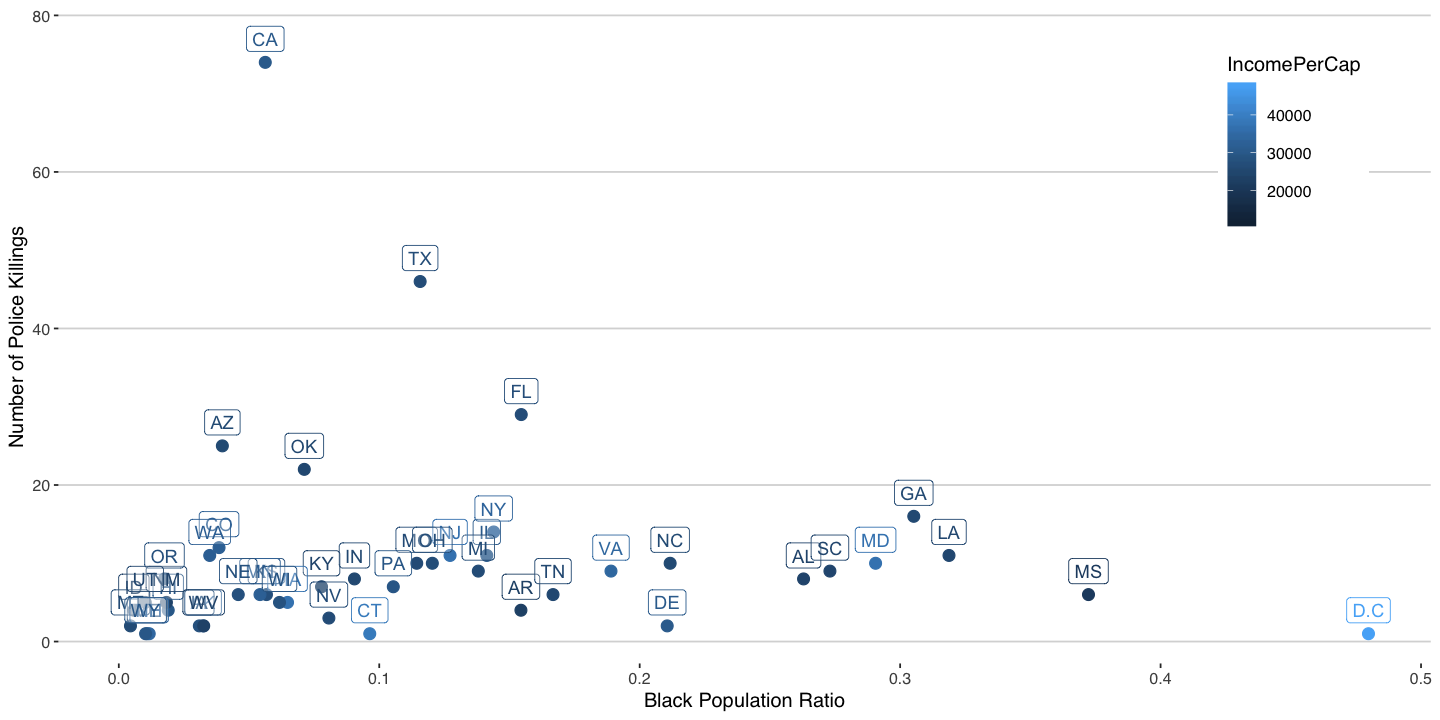

In [56]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(data = new_joined) +
    #geom_point(aes(x = Black, y = n,)) + 
    geom_point(aes(x = Black, y = n, colour = IncomePerCap), size=3) + 
    geom_label(aes(x = Black, y = n, label = State, colour=IncomePerCap), nudge_y = 3, alpha=0.25) +
    labs(fill = "Income Per Capita") + 
    ylab("Number of Police Killings") + 
    xlab("Black Population Ratio") + 
    theme_hc()+ 
    theme(legend.position = c(0.9, 0.8))
          #legend.direction = "horizontal")

Warning message:
“Removed 5 rows containing missing values (geom_text).”

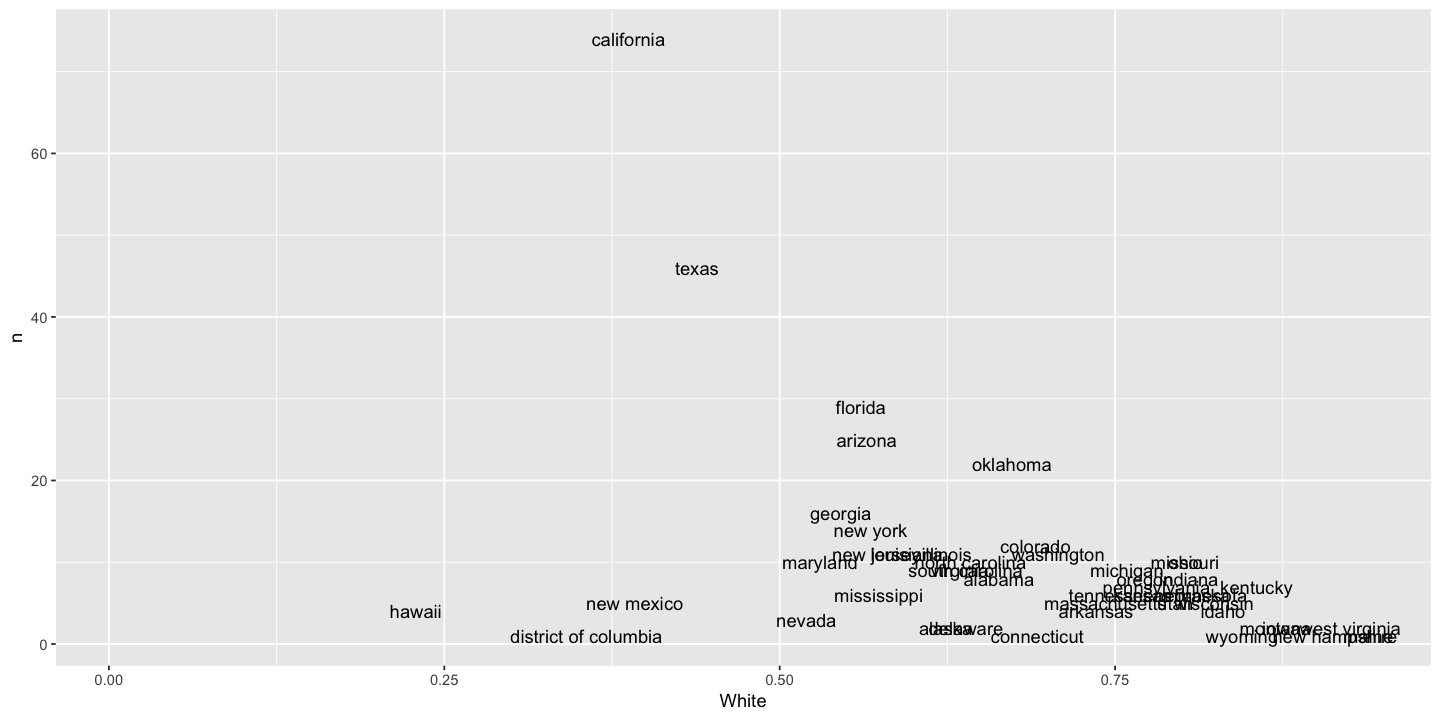

In [57]:
ggplot(data = joined_data) +
    #geom_point(aes(x = Black, y = n,)) + 
    geom_text(aes(x = White, y = n, label = State))

In [58]:
names(joined_data)

[1] "State"        "Men"          "Women"        "Hispanic"     "White"       
 [6] "Black"        "Native"       "Asian"        "Pacific"      "Citizen"     
[11] "IncomePerCap" "Pov"          "ChildPov"     "Professional" "Service"     
[16] "Office"       "Construction" "Production"   "Drive"        "Carpool"     
[21] "Employed"     "WFH"          "AVG_Commute"  "Private_work" "Public_work" 
[26] "SelfEmployed" "Unemployment" "n"

Warning message:
“Removed 5 rows containing missing values (geom_point).”

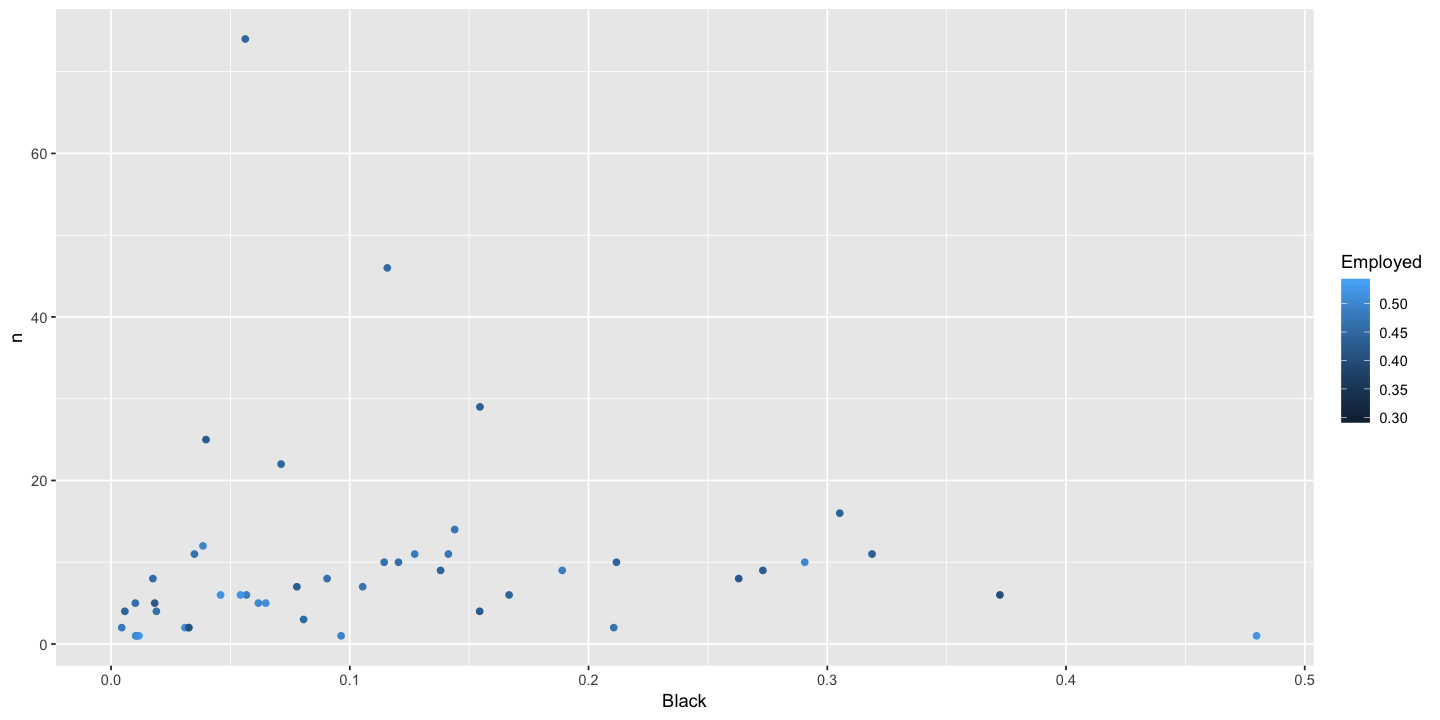

In [59]:
ggplot(data = joined_data) +
    geom_point(aes(x = Black, y = n, color=Employed)) 

Warning message:
“Removed 5 rows containing missing values (geom_point).”

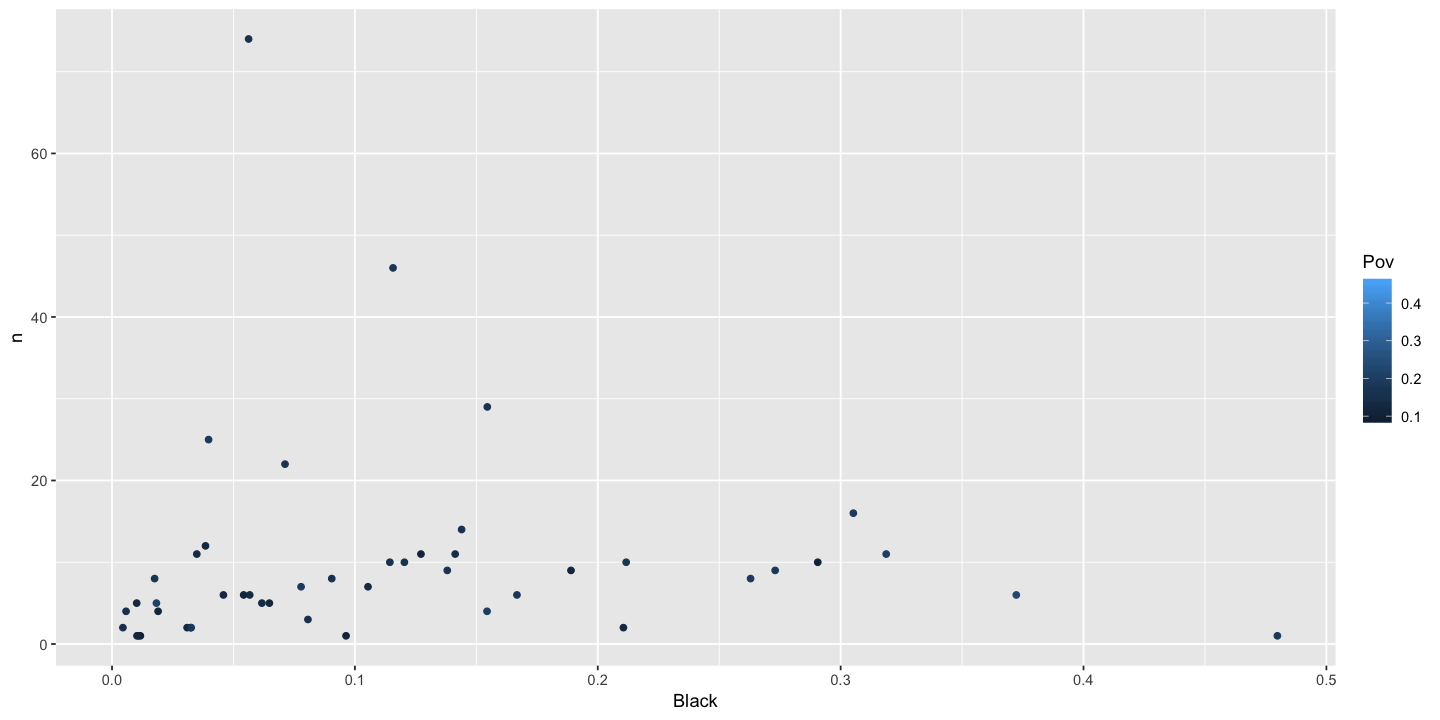

In [60]:
ggplot(data = joined_data) +
    geom_point(aes(x = Black, y = n, color=Pov)) 

In [61]:
# census$State = tolower(census$State)

In [62]:
census_sorted_1 = census %>%
    dplyr::group_by(State) %>%
    dplyr::summarise(black_mean = mean(Black)) %>%
    arrange(-black_mean)
census_sorted_1$State

[1] District of Columbia Mississippi          Louisiana           
 [4] Georgia              Alabama              Maryland            
 [7] South Carolina       North Carolina       Delaware            
[10] Virginia             Arkansas             Tennessee           
[13] Michigan             Illinois             Ohio                
[16] New York             Florida              New Jersey          
[19] Missouri             Texas                Pennsylvania        
[22] Indiana              Connecticut          Oklahoma            
[25] Kentucky             Wisconsin            Nevada              
[28] Massachusetts        Kansas               Rhode Island        
[31] California           Minnesota            Nebraska            
[34] Arizona              West Virginia        Colorado            
[37] Washington           Iowa                 Hawaii              
[40] Alaska               Oregon               New Mexico          
[43] South Dakota         Maine                New Hampshire       
[46] North Dakota         Wyoming              Utah                
[49] Vermont              Puerto Rico          Idaho               
[52] Montana             
52 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [63]:
mathed_names = state.abb[match(census_sorted_1$State,state.name)]
mathed_names[1] = 'D.C.'
mathed_names[length(mathed_names)-2] = 'PR'

In [64]:
mathed_names

[1] "D.C." "MS"   "LA"   "GA"   "AL"   "MD"   "SC"   "NC"   "DE"   "VA"  
[11] "AR"   "TN"   "MI"   "IL"   "OH"   "NY"   "FL"   "NJ"   "MO"   "TX"  
[21] "PA"   "IN"   "CT"   "OK"   "KY"   "WI"   "NV"   "MA"   "KS"   "RI"  
[31] "CA"   "MN"   "NE"   "AZ"   "WV"   "CO"   "WA"   "IA"   "HI"   "AK"  
[41] "OR"   "NM"   "SD"   "ME"   "NH"   "ND"   "WY"   "UT"   "VT"   "PR"  
[51] "ID"   "MT"

In [65]:
census$State = tolower(census$State)

In [66]:
census_sorted = census %>%
    dplyr::group_by(State) %>%
    dplyr::summarise(black_mean = mean(Black)) %>%
    arrange(-black_mean)
census_sorted$State

[1] "district of columbia" "mississippi"          "louisiana"           
 [4] "georgia"              "alabama"              "maryland"            
 [7] "south carolina"       "north carolina"       "delaware"            
[10] "virginia"             "arkansas"             "tennessee"           
[13] "michigan"             "illinois"             "ohio"                
[16] "new york"             "florida"              "new jersey"          
[19] "missouri"             "texas"                "pennsylvania"        
[22] "indiana"              "connecticut"          "oklahoma"            
[25] "kentucky"             "wisconsin"            "nevada"              
[28] "massachusetts"        "kansas"               "rhode island"        
[31] "california"           "minnesota"            "nebraska"            
[34] "arizona"              "west virginia"        "colorado"            
[37] "washington"           "iowa"                 "hawaii"              
[40] "alaska"               "oregon"               "new mexico"          
[43] "south dakota"         "maine"                "new hampshire"       
[46] "north dakota"         "wyoming"              "utah"                
[49] "vermont"              "puerto rico"          "idaho"               
[52] "montana"

In [67]:
census$State <- factor(census$State, levels=census_sorted$State)

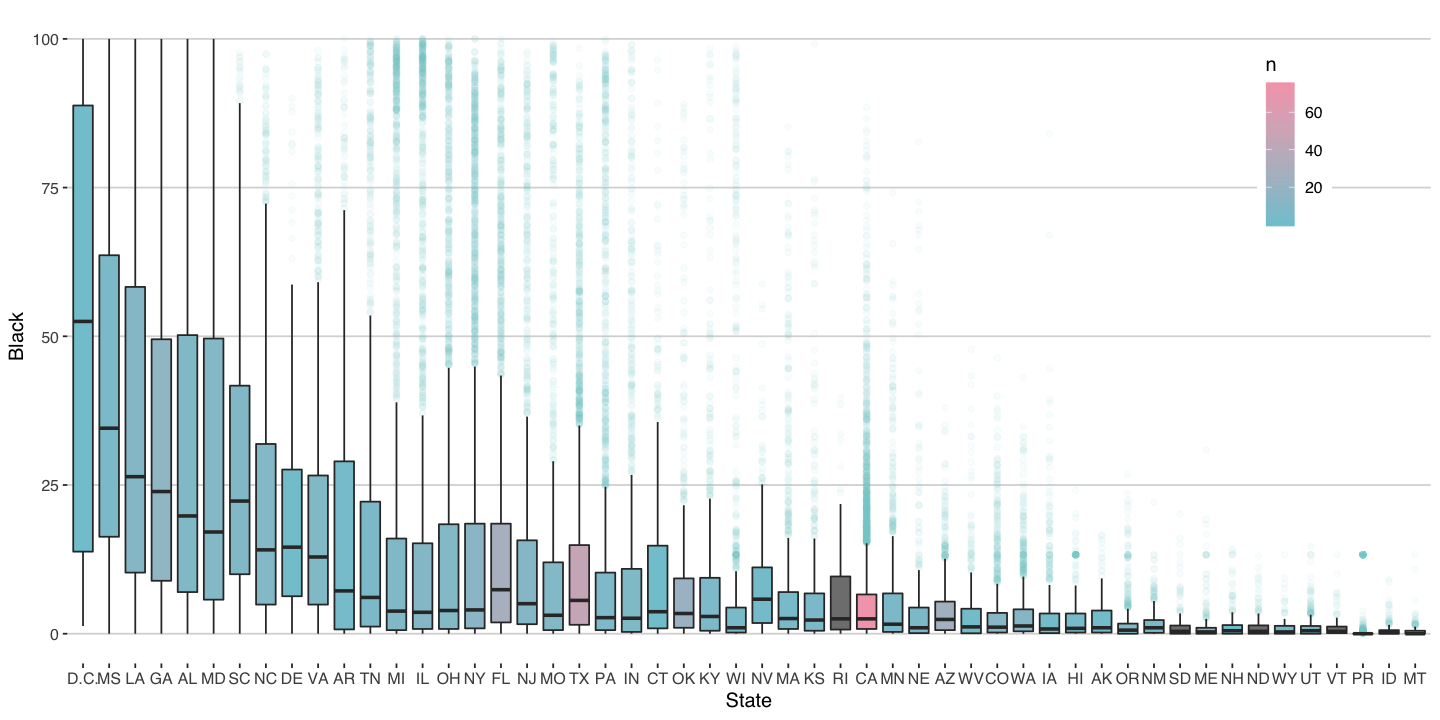

In [68]:
census_merged = merge(census, joined_data[, c("State", 'n')], by.x = 'State', by.y='State',all.x = TRUE)
ggplot(data=census_merged)+
    geom_boxplot(aes(x=State, y=Black, fill=n), outlier.alpha=0.05, outlier.color='#81C7D4') +
    scale_x_discrete(labels=mathed_names) + 
    theme_hc()+ 
    scale_fill_gradient(low = "#81C7D4",  high = "#F4A7B9") + 
    theme(legend.position = c(0.9, 0.8))

In [69]:
tmp_pop = census %>%
    dplyr::group_by(State) %>%
    dplyr::summarise(total = sum(TotalPop))

In [70]:
tmp = joined_data[, c("State", 'n')]
tmp[is.na(tmp)] = 0 
tmp$killing_ratio = tmp$n/tmp_pop$total

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 7.5
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

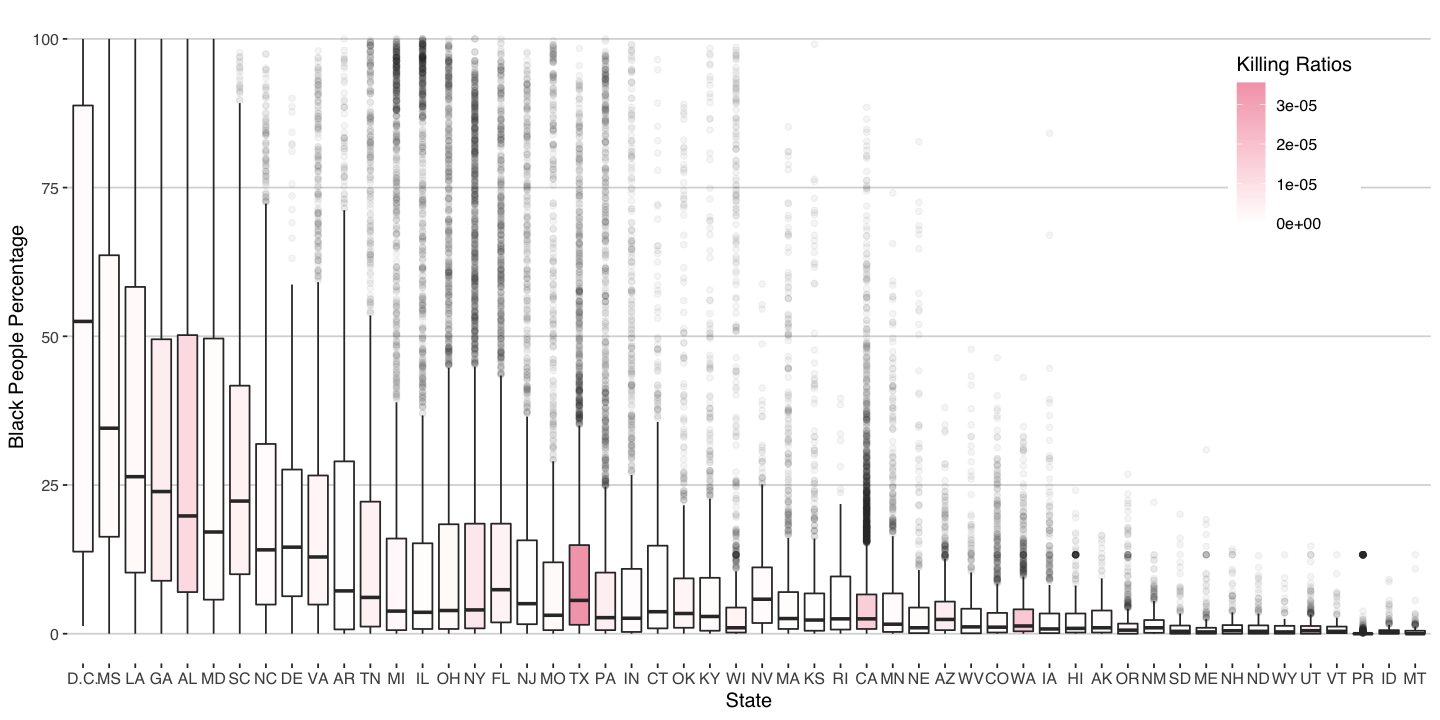

In [71]:
census_merged = merge(census, tmp , by.x = 'State', by.y='State',all.x = TRUE)
ggplot(data=census_merged)+
    geom_boxplot(aes(x=State, y=Black, fill=killing_ratio), outlier.alpha=0.05) +
    scale_x_discrete(labels=mathed_names) + 
    ylab("Black People Percentage") + 
    theme_hc()+ 
    scale_fill_gradient(low = "white",  high = "#F4A7B9") + 
    theme(legend.position = c(0.9, 0.8)) +
    labs(fill="Killing Ratios")
    theme(axis.text.x = element_text(size=7.5)) 

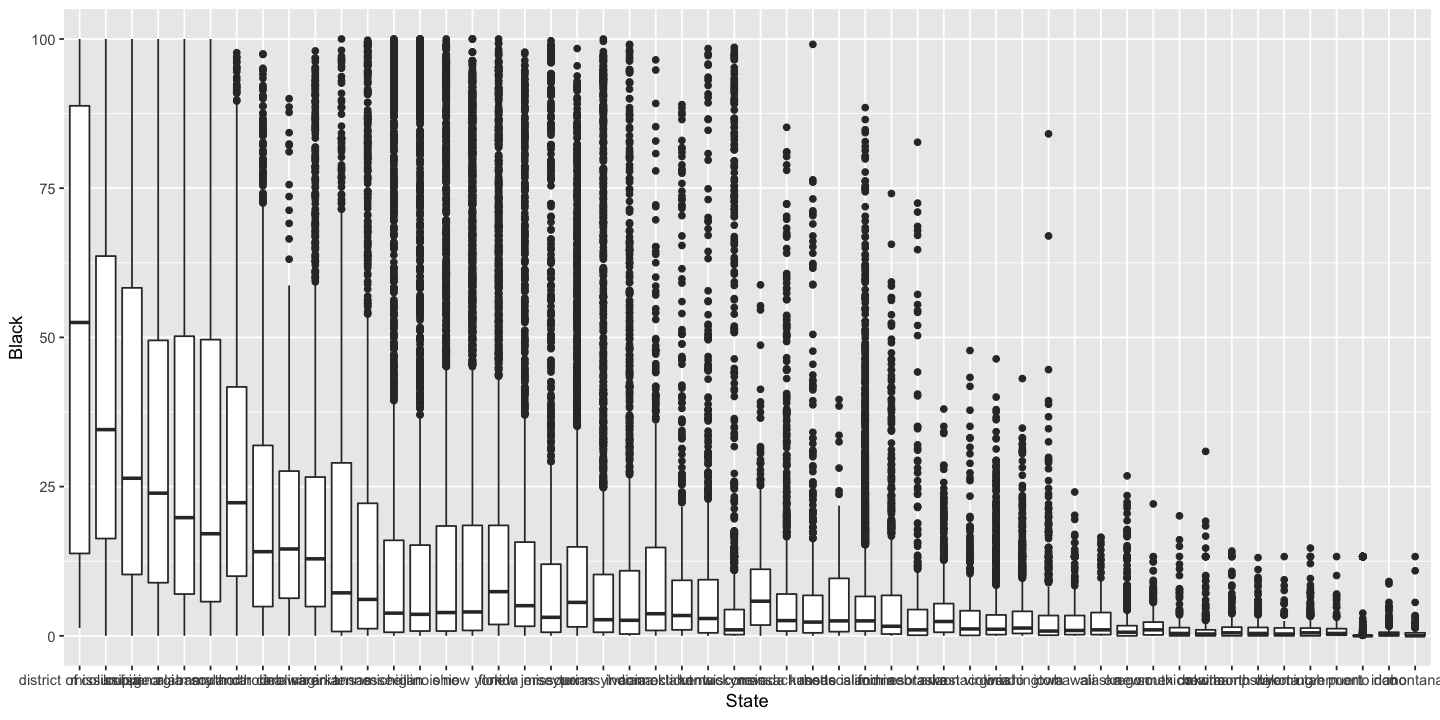

In [72]:
ggplot(data=census)+
    geom_boxplot(aes(x=State, y=Black), )

In [73]:
census$State = tolower(census$State)

In [74]:
new_joined = joined_data
new_joined$State = state_abbr_names
new_joined$Other = new_joined$Native + new_joined$Asian + new_joined$Pacific

In [75]:
new_joined$Other = new_joined$Native + new_joined$Asian + new_joined$Pacific

In [76]:
new_joined$Other 

[1] 0.0171400942 0.2035981974 0.0709434148 0.0213567078 0.1424724742
 [6] 0.0351288434 0.0431458073 0.0389364070 0.0385575273 0.0280003663
[11] 0.0380432914 0.4600138164 0.0244877606 0.0511000413 0.0204893924
[16] 0.0234662634 0.0335184759 0.0146686759 0.0223441855 0.0166565699
[21] 0.0623046860 0.0608200330 0.0319663011 0.0540349518 0.0137549494
[26] 0.0221160405 0.0702036151 0.0278426712 0.0903365100 0.0251115012
[31] 0.0911064924 0.0985343817 0.0818109975 0.0361293824 0.0646260642
[36] 0.0202166577 0.0897100004 0.0520552328 0.0317994929 0.0006813004
[41] 0.0359676718 0.0173210279 0.0953602676 0.0182500097 0.0450276715
[46] 0.0399800167 0.0171039732 0.0619628375 0.0936460699 0.0088978065
[51] 0.0330854653 0.0285557386

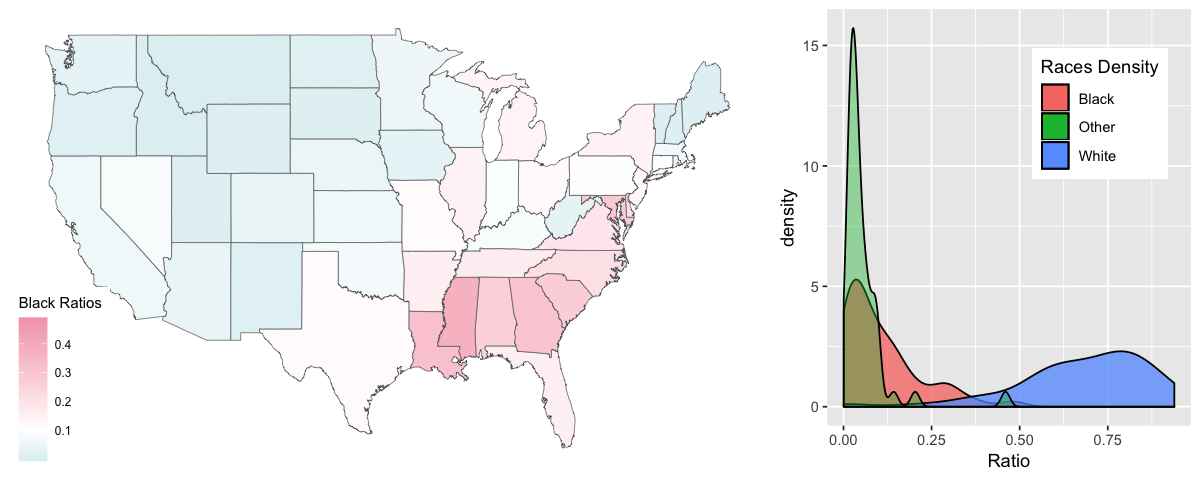

In [77]:
options(repr.plot.width=10, repr.plot.height=4)
p2<-ggplot(new_joined) + 
    geom_density(aes(x=Black, fill="Black"), alpha=0.75) +
    geom_density(aes(x=White, fill="White"), alpha=0.75) + 
    geom_density(aes(x=Other, fill="Other"), alpha=0.40) + 
    labs(fill="Races Density") + 
    xlab("Ratio") + 
    theme(legend.position = c(0.75, 0.75))

p1<-plot_map('Black', "Fig3: Black Ratio in different states", "Black Ratios", midpoint = 0.1)
grid.arrange(p1, p2, widths=c(1.8,1))

In [78]:
# us_states <- map_data("state")
# head(us_states)
# aggregated_data$State = tolower(State)
# temp = names(us_states)
# temp[5] = "State"
# names(us_states) = temp
us_states_data_2 <- left_join(us_states, tmp, by = "State")
head(us_states_data_2)

long      lat      group order State   subregion n killing_ratio
1 -87.46201 30.38968 1     1     alabama NA        8 1.235552e-05 
2 -87.48493 30.37249 1     2     alabama NA        8 1.235552e-05 
3 -87.52503 30.37249 1     3     alabama NA        8 1.235552e-05 
4 -87.53076 30.33239 1     4     alabama NA        8 1.235552e-05 
5 -87.57087 30.32665 1     5     alabama NA        8 1.235552e-05 
6 -87.58806 30.32665 1     6     alabama NA        8 1.235552e-05

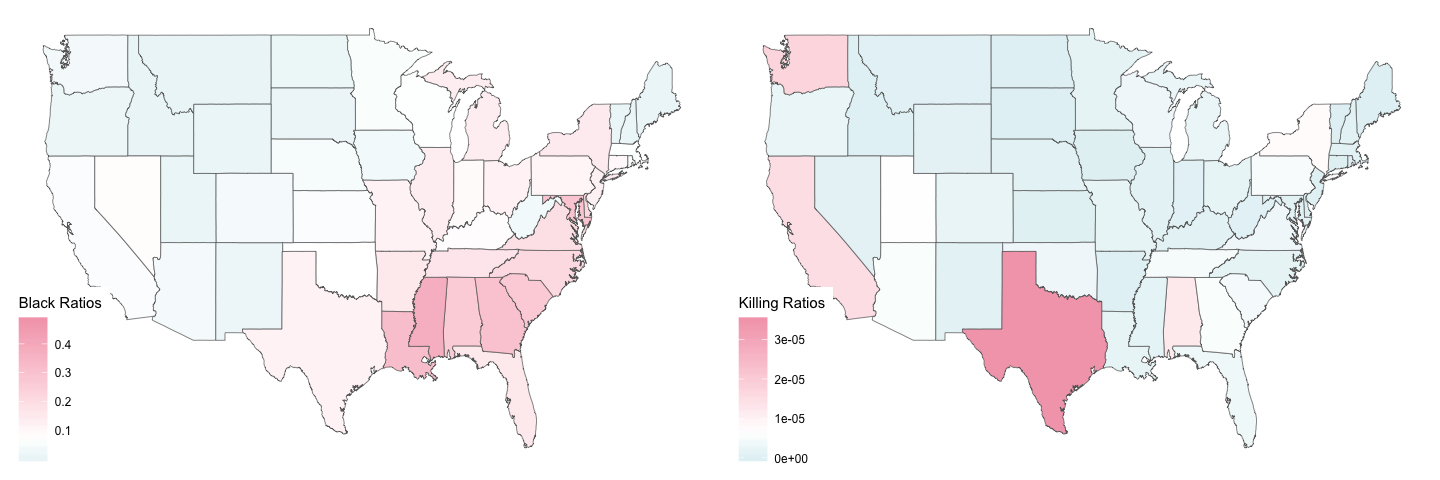

In [79]:
options(repr.plot.width=12, repr.plot.height=4)
p1<-plot_map('Black', "Fig3: Black Ratio in different states", "Black Ratios", midpoint = 0.07)
p2 <- ggplot(data = us_states_data_2,
             mapping = aes(x = long, y = lat, group = group, fill = killing_ratio)) + 
      geom_polygon(color = "gray40", size = 0.2) +
      # coord_map(projection = "albers", lat0 = 39, lat1 = 45) + 
      scale_fill_gradient2(low = "#81C7D4",  high = "#F4A7B9", midpoint=0.65e-5) + 
      # scale_fill_gradient1(low = "white", high = "#FF0000") +
      # ggtitle(title) + 
      labs(fill = 'Killing Ratios') + 
      theme_map()
grid.arrange(p1, p2, widths=c(1,1))

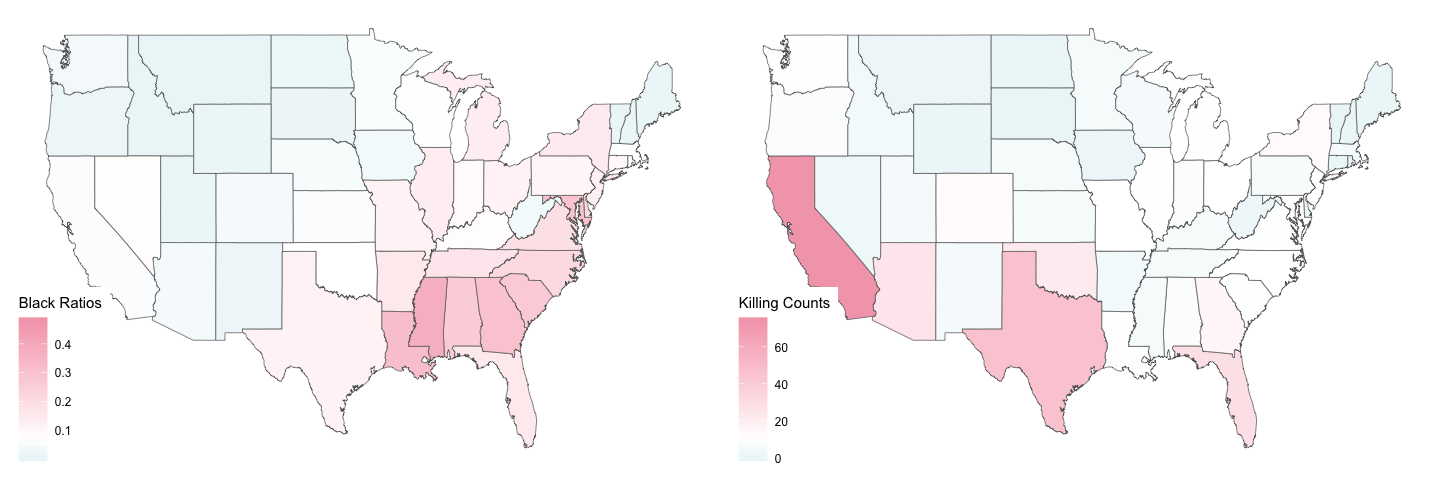

In [80]:
options(repr.plot.width=12, repr.plot.height=4)
p1<-plot_map('Black', "Fig3: Black Ratio in different states", "Black Ratios", midpoint = 0.07)
p2 <- ggplot(data = us_states_data_2,
             mapping = aes(x = long, y = lat, group = group, fill = n)) + 
      geom_polygon(color = "gray40", size = 0.2) +
      # coord_map(projection = "albers", lat0 = 39, lat1 = 45) + 
      scale_fill_gradient2(low = "#81C7D4",  high = "#F4A7B9", midpoint=10) + 
      # scale_fill_gradient1(low = "white", high = "#FF0000") +
      # ggtitle(title) + 
      labs(fill = "Killing Counts") + 
      theme_map()
grid.arrange(p1, p2, widths=c(1,1))

In [29]:
killings = read.csv('police_killings_cleaned.csv', header = TRUE)

In [30]:
killings$gender = factor(killings$gender)
killings$raceethnicity = factor(killings$raceethnicity)
killings$day = factor(killings$day)
killings$city = factor(killings$city)
killings$cause = factor(killings$cause)
killings$armed = factor(killings$armed)
killings$county_bucket = factor(killings$county_bucket)
killings$nat_bucket = factor(killings$nat_bucket)

as.numeric.factor <- function(x) {as.numeric(levels(x))[x]}
killings$pov = as.numeric.factor(killings$pov)
killings$p_income = as.numeric.factor(killings$p_income)
killings$share_black = as.numeric.factor(killings$share_black)
killings$share_white = as.numeric.factor(killings$share_white)
killings$share_hispanic = as.numeric.factor(killings$share_hispanic)

Warning message in as.numeric.factor(killings$pov):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$p_income):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_black):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_white):
“NAs introduced by coercion”Warning message in as.numeric.factor(killings$share_hispanic):
“NAs introduced by coercion”

In [83]:
length(killings[rowSums(is.na(killings))>0, ])

[1] 34

In [84]:
levels(killings$raceethnicity)

[1] "Asian/Pacific Islander" "Black"                  "Hispanic/Latino"       
[4] "Native American"        "Unknown"                "White"

In [35]:
length(killings[(killings$raceethnicity != 'Black') & (killings$raceethnicity != 'White'), ])

[1] 34

In [43]:
dim(killings[killings$raceethnicity == "Other", ])

[1] 96 34

In [44]:
96/467

[1] 0.2055675

In [33]:
levels(killings$raceethnicity) <- c(levels(killings$raceethnicity), "Other")
killings[killings['raceethnicity']!= "Black" & killings['raceethnicity']!= "White", 'raceethnicity'] = "Other"

In [39]:
killings$p_income = as.numeric(killings$p_income)
killings$h_income = as.numeric(killings$h_income)
killings$share_black = as.numeric(killings$share_black)

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

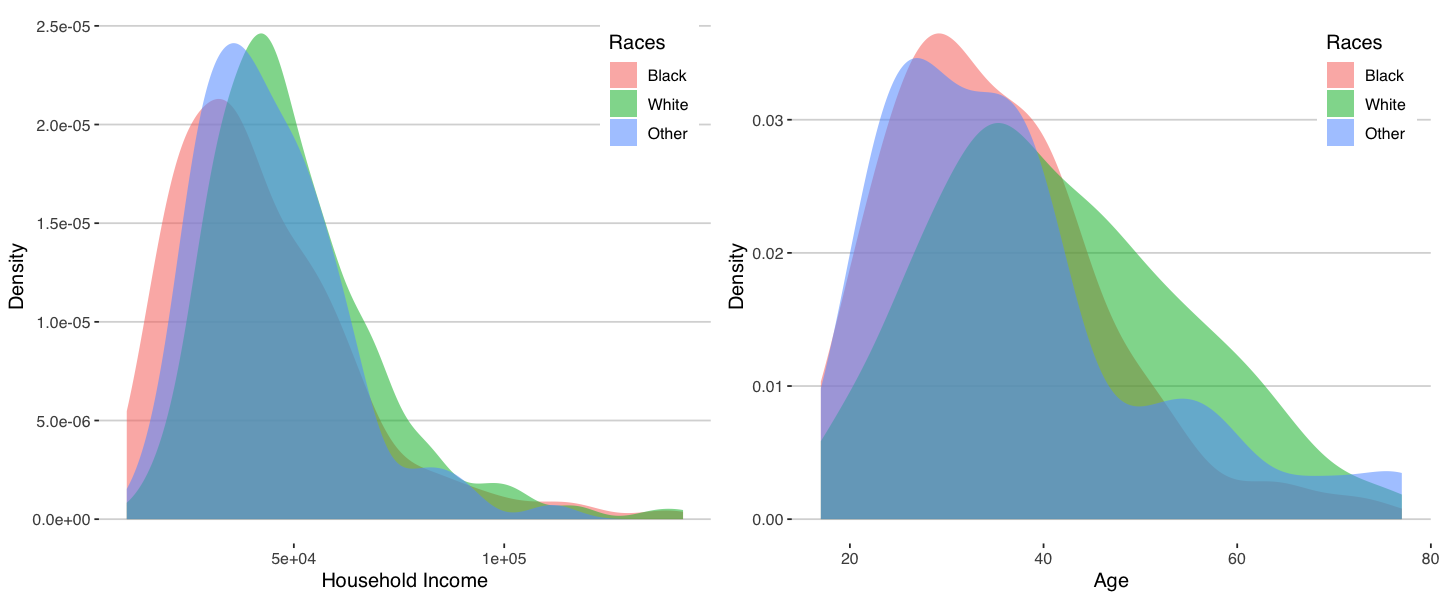

In [40]:
options(repr.plot.width=12, repr.plot.height=5)

p1 <- ggplot(data = killings) +
      geom_density(aes(x=h_income, fill=raceethnicity), alpha=0.55, color = NA) + 
      xlab("Household Income") +
      ylab("Density")  +
      labs(fill="Races") + 
      theme_hc()+ 
      theme(legend.position = c(0.90, 0.85))
p2 <- ggplot(data = killings) +
      geom_density(aes(x=age, fill=raceethnicity), alpha=0.55, color = NA) + 
      theme_hc()+ 
      xlab("Age") +
      ylab("Density")  +
      labs(fill="Races") + 
      theme(legend.position = c(0.90, 0.85))
grid.arrange(p1, p2, widths=c(1,1))

In [41]:
killings

name                    age gender raceethnicity month    day year
1   A'donte Washington      17  Male   Black         February 23  2015
2   Aaron Rutledge          28  Male   White         April    2   2015
3   Aaron Siler             27  Male   White         March    14  2015
4   Aaron Valdez            26  Male   Other         March    11  2015
5   Adam Jovicic            30  Male   White         March    19  2015
6   Adam Reinhart           30  Male   White         March    7   2015
7   Adrian Hernandez        23  Male   Other         March    27  2015
8   Adrian Solis            36  Male   Other         March    26  2015
9   Alan Alverson           45  Male   White         January  28  2015
10  Alan James              32  Male   White         February 7   2015
11  Albert Hanson Jr        73  Male   White         April    26  2015
12  Alec Ouzounian          41  Male   White         May      12  2015
13  Alejandro Salazar       77  Male   Other         February 20  2015
14  Alexander Long          32  Male   White         February 25  2015
15  Alexander Myers         24  Male   White         April    6   2015
16  Alexander Rivera        40  Male   Other         May      30  2015
17  Alexia Christian        26  Female Black         April    30  2015
18  Alfredo Rials-Torres    55  Male   Other         May      19  2015
19  Alice Brown             25  Female White         March    17  2015
20  Alvin Haynes            58  Male   Black         January  26  2015
21  Amilcar Perez-Lopez     22  Male   Other         February 26  2015
22  Andre Murphy Sr         43  Male   Black         January  7   2015
23  Andres Lara-Rodriguez   22  Male   Other         February 13  2015
24  Andrew Driver           37  Male   White         March    13  2015
25  Andrew Jackson          27  Male   White         April    29  2015
26  Andrew Shipley          50  Male   White         March    17  2015
27  Andrew Toto             55  Male   White         January  21  2015
28  Andrew Valadez          27  Male   White         April    23  2015
29  Andrew Williams         49  Male   Black         March    6   2015
30  Andy Martinez           34  Male   Other         January  9   2015
⋮   ⋮                       ⋮   ⋮      ⋮             ⋮        ⋮   ⋮   
438 Tiffany Terry           40  Female White         January  30  2015
439 Tim Elliott             54  Male   Other         January  2   2015
440 Timothy Jones           28  Male   White         May      17  2015
441 Todd Allen Hodge        37  Male   White         January  21  2015
442 Todd Jamal Dye          21  Male   Black         April    24  2015
443 Tommy Smith             40  Male   White         January  12  2015
444 Tony Robinson           20  Male   Black         March    6   2015
445 Tony Ross               35  Male   White         March    6   2015
446 Troy Boyd               37  Male   White         March    15  2015
447 Tyrel Vick              35  Male   White         March    20  2015
448 Tyrell Larsen           32  Male   White         April    6   2015
449 Tyrone Ryerson          46  Male   Black         March    5   2015
450 Tyson Hubbard           35  Male   White         March    5   2015
451 Unknown                 77  Male   Other         January  16  2015
452 Unknown                 77  Female Other         May      25  2015
453 Unknown                 77  Male   White         June     1   2015
454 Victor Reyes            32  Male   Other         January  31  2015
455 Victor Terrazas         29  Male   Other         March    25  2015
456 Vincent Cordaro         58  Male   White         February 9   2015
457 Walter Brown III        30  Male   Black         March    24  2015
458 Walter Scott            51  Male   Black         April    4   2015
459 Wendell King            41  Male   White         January  29  2015
460 Wilber Castillo-Gongora 36  Male   Other         February 5   2015
461 William 'Rusty' Smith   54  Male   White         March    10  2015
462 William Campbell        

Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing non-finite values (stat_density2d).”

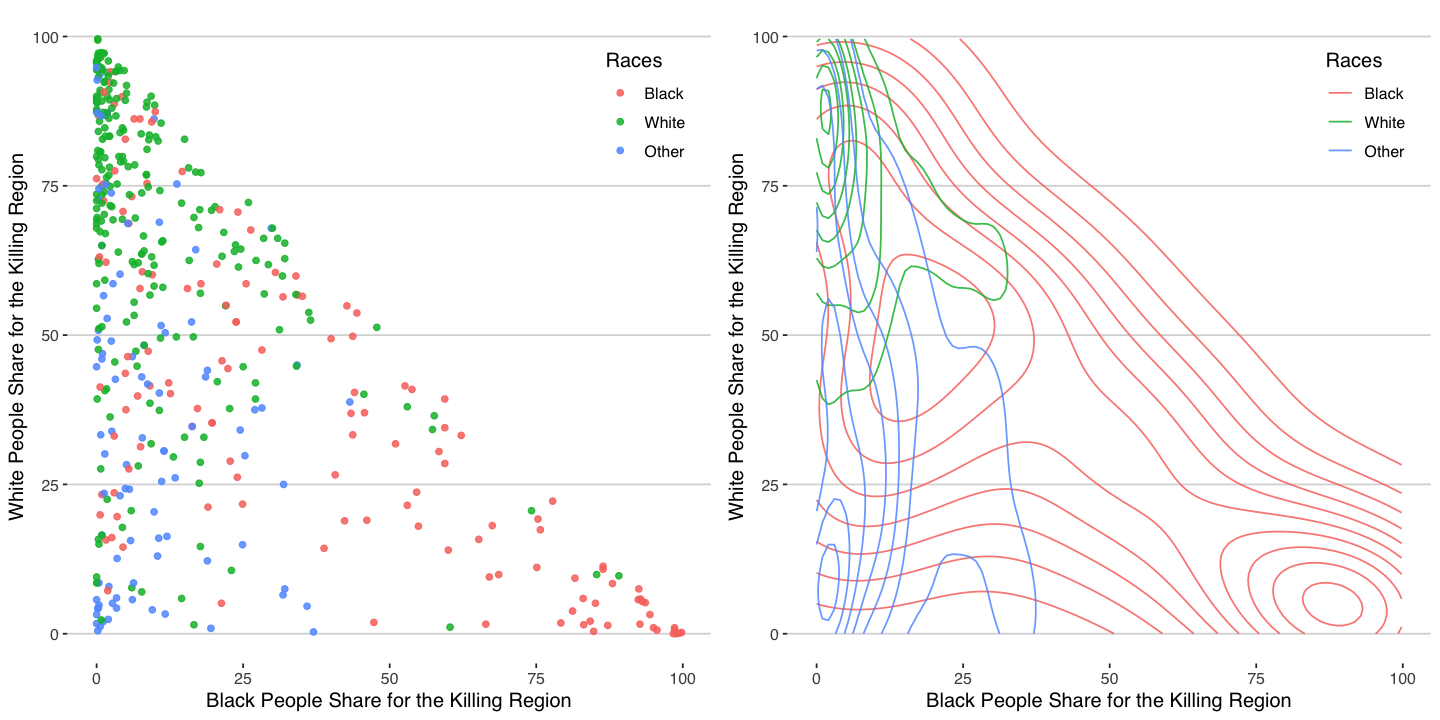

In [42]:
options(repr.plot.width=12, repr.plot.height=6)

p1 <- ggplot(data = killings) +
      geom_point(aes(x=share_black, y=share_white, color=raceethnicity), alpha=0.85) +
      xlab("Black People Share for the Killing Region") +
      ylab("White People Share for the Killing Region")  +
      labs(color="Races") + 
      theme_hc()+ 
      theme(legend.position = c(0.90, 0.85))
p2 <- ggplot(data = killings) +
      geom_density2d(aes(x=share_black, y=share_white, color=raceethnicity), alpha=0.85, linemitre = 3)+
      xlab("Black People Share for the Killing Region") +
      ylab("White People Share for the Killing Region") +
      labs(color="Races") + 
      theme_hc()+ 
      theme(legend.position = c(0.90, 0.85))  
grid.arrange(p1, p2, widths=c(1,1))